Version 1.0.2

# Pandas basics 

Hi! In this programming assignment you need to refresh your `pandas` knowledge. You will need to do several [`groupby`](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.groupby.html)s and [`join`]()`s to solve the task. 

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
%matplotlib inline 

from grader import Grader

In [2]:
DATA_FOLDER = '../readonly/final_project_data/'

transactions    = pd.read_csv(os.path.join(DATA_FOLDER, 'sales_train.csv.gz'))
items           = pd.read_csv(os.path.join(DATA_FOLDER, 'items.csv'))
item_categories = pd.read_csv(os.path.join(DATA_FOLDER, 'item_categories.csv'))
shops           = pd.read_csv(os.path.join(DATA_FOLDER, 'shops.csv'))

The dataset we are going to use is taken from the competition, that serves as the final project for this course. You can find complete data description at the [competition web page](https://www.kaggle.com/c/competitive-data-science-final-project/data). To join the competition use [this link](https://www.kaggle.com/t/1ea93815dca248e99221df42ebde3540).

## Grading

We will create a grader instace below and use it to collect your answers. When function `submit_tag` is called, grader will store your answer *locally*. The answers will *not* be submited to the platform immediately so you can call `submit_tag` function as many times as you need. 

When you are ready to push your answers to the platform you should fill your credentials and run `submit` function in the <a href="#Authorization-&-Submission">last paragraph</a>  of the assignment.

In [3]:
grader = Grader()

# Task

Let's start with a simple task. 

<ol start="0">
  <li><b>Print the shape of the loaded dataframes and use [`df.head`](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.head.html) function to print several rows. Examine the features you are given.</b></li>
</ol>

In [4]:
# YOUR CODE GOES HERE
print(type(transactions))
print(type(items))
print(type(item_categories))
print(type(shops))
print("### ### ### ### ### ### ### ### ### ### ### ### ### ### ### ### ### ### ### ### ### ### ### ### ### ### ### ###")
print(transactions.shape)
print(items.shape)
print(item_categories.shape)
print(shops.shape)
print("### ### ### ### ### ### ### ### ### ### ### ### ### ### ### ### ### ### ### ### ### ### ### ### ### ### ### ###")
print(transactions.head)
print("*** *** *** *** *** *** *** *** *** *** *** *** *** *** *** *** *** *** *** *** *** *** *** *** *** *** *** ***")
print(items.head)
print("*** *** *** *** *** *** *** *** *** *** *** *** *** *** ****** *** *** *** *** *** *** *** *** *** *** *** ***")
print(item_categories.head)
print("*** *** *** *** *** *** *** *** *** *** *** *** *** *** *** *** *** *** *** *** *** *** *** *** *** *** *** ***")
print(shops.head)

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>
### ### ### ### ### ### ### ### ### ### ### ### ### ### ### ### ### ### ### ### ### ### ### ### ### ### ### ###
(2935849, 6)
(22170, 3)
(84, 2)
(60, 2)
### ### ### ### ### ### ### ### ### ### ### ### ### ### ### ### ### ### ### ### ### ### ### ### ### ### ### ###
<bound method NDFrame.head of                date  date_block_num  shop_id  item_id  item_price  \
0        02.01.2013               0       59    22154      999.00   
1        03.01.2013               0       25     2552      899.00   
2        05.01.2013               0       25     2552      899.00   
3        06.01.2013               0       25     2554     1709.05   
4        15.01.2013               0       25     2555     1099.00   
5        10.01.2013               0       25     2564      349.00   
6        02.01.2013               0       25     2565      549.00   
7 

Now use your `pandas` skills to get answers for the following questions. 
The first question is:

1. ** What was the maximum total revenue among all the shops in September, 2014?** 


* Hereinafter *revenue* refers to total sales minus value of goods returned.

*Hints:*

* Sometimes items are returned, find such examples in the dataset. 
* It is handy to split `date` field into [`day`, `month`, `year`] components and use `df.year == 14` and `df.month == 9` in order to select target subset of dates.
* You may work with `date` feature as with srings, or you may first convert it to `pd.datetime` type with `pd.to_datetime` function, but do not forget to set correct `format` argument.

In [5]:
# YOUR CODE GOES HERE
#print(shops.head(-5))
allshops_set = []
revenue_dict = dict()
allshops_set = list(set(shops.shop_id))
#print(allshops_set)
revenue_dict = {k:0 for k in allshops_set}
#print(revenue_dict)
revenue_value = 0

for i in range(0,transactions.shape[0]): 
        #print(i if i%1000 else '\r', end='\t')
        if (transactions.date[i][3:5] == '09' and transactions.date[i][6:10] == '2014'):
            revenue_value = round(transactions.item_price[i]*transactions.item_cnt_day[i],3)
            #if (i%1000==0):
            #print(str(i)+"  :  "+str(revenue_value),end='\t')
            revenue_dict[transactions.shop_id[i]] += revenue_value

#print('\r\n')            
#for k,v in revenue_dict.items(): 
#print(str(k)+" : "+str(v),end='\t')
#print('\r\n')   
max_revenue = max(revenue_dict.values()) # PUT YOUR ANSWER IN THIS VARIABLE
grader.submit_tag('max_revenue', max_revenue)

Current answer for task max_revenue is: 7982852.2


Great! Let's move on and answer another question:

<ol start="2">
  <li><b>What item category generated the highest revenue in summer 2014?</b></li>
</ol>

* Submit `id` of the category found.
    
* Here we call "summer" the period from June to August.

*Hints:*

* Note, that for an object `x` of type `pd.Series`: `x.argmax()` returns **index** of the maximum element. `pd.Series` can have non-trivial index (not `[1, 2, 3, ... ]`).

In [6]:
# YOUR CODE GOES HERE
category_groups = items.groupby(['item_category_id'])
#print(category_groups.first())
#print('\r\n')  
#print(category_groups.groups[0])
#print('\r\n')

item_groups = transactions.groupby(['item_id'])
#print(item_groups.first())
#print('\r\n')            
#print(item_groups.groups[0])
#print('\r\n')   
#print(item_groups.groups.keys())
#print('\r\n')            
#print(item_groups.groups.values())
#print('\r\n') 

max_item_id = 0
max_revenue = 0

for category_id in category_groups.groups.keys():
    category_revenue = 0
    print('\n')
    print("category --- %d"%(category_id), end=' ')
    print('\r')
    
    for item_id in category_groups.groups[category_id]:
        print(" *** %d"%(item_id), end='\t')
        if (item_id in item_groups.groups.keys()):
            print(" <i %d j %d: %d> "%(item_id, item_id, len(item_groups.groups[item_id])), end='\t')
            for i in item_groups.groups[item_id]:
                if (len(item_groups.groups[item_id])==1): print("{%d}" % i, end='\t')
                if ((6 <= int(transactions.date[i][3:5]) <= 8) and transactions.date[i][6:10] == '2014'):
                    category_revenue += round(transactions.item_price[i] * transactions.item_cnt_day[i],3)
        else:
            print(" (i): %d"%(item_id), end='\t')
            
    if(category_revenue > max_revenue):
        max_revenue = category_revenue
        max_id = category_id
        print('\n')
        print('Highest revenue %d so far: Category %d\n' %(max_revenue, max_id), end='')
        print('\r')
    print('\r', end=' ')           
category_id_with_max_revenue = max_id # PUT YOUR ANSWER IN THIS VARIABLE
grader.submit_tag('category_id_with_max_revenue', category_id_with_max_revenue)



category --- 0 
 *** 5441	 (i): 5441	 *** 16255	 <i 16255 j 16255: 1> 	{182616}	 *** 16256	 <i 16256 j 16256: 1> 	{439377}	 *** 16257	 <i 16257 j 16257: 1> 	{5558}	

category --- 1 
 *** 5606	 <i 5606 j 5606: 1> 	{112968}	 *** 5740	 <i 5740 j 5740: 1> 	{181531}	

category --- 2 
 *** 5570	 <i 5570 j 5570: 1> 	{181590}	 *** 5571	 <i 5571 j 5571: 138> 	 *** 5572	 <i 5572 j 5572: 1761> 	 *** 5573	 <i 5573 j 5573: 618> 	 *** 5574	 <i 5574 j 5574: 701> 	 *** 5575	 <i 5575 j 5575: 490> 	 *** 5576	 <i 5576 j 5576: 303> 	 *** 5607	 <i 5607 j 5607: 293> 	 *** 5608	 <i 5608 j 5608: 150> 	 *** 5609	 <i 5609 j 5609: 51> 	 *** 5610	 <i 5610 j 5610: 192> 	 *** 5611	 <i 5611 j 5611: 49> 	 *** 5612	 <i 5612 j 5612: 460> 	 *** 5613	 <i 5613 j 5613: 590> 	 *** 5614	 <i 5614 j 5614: 41> 	 *** 5615	 <i 5615 j 5615: 144> 	 *** 5616	 <i 5616 j 5616: 224> 	 *** 5617	 <i 5617 j 5617: 19> 	 *** 5618	 <i 5618 j 5618: 2> 	 *** 5619	 <i 5619 j 5619: 1> 	{1394121}	 *** 5620	 <i 5620 j 5620: 240> 	 *** 5621	 <i 5

 *** 6670	 <i 6670 j 6670: 1> 	{1013900}	 *** 6671	 <i 6671 j 6671: 18> 	 *** 6672	 <i 6672 j 6672: 511> 	 *** 6673	 <i 6673 j 6673: 138> 	 *** 13433	 <i 13433 j 13433: 17> 	 *** 13434	 <i 13434 j 13434: 4> 	 *** 13435	 <i 13435 j 13435: 61> 	 *** 13436	 <i 13436 j 13436: 118> 	 *** 13437	 <i 13437 j 13437: 45> 	 *** 13438	 <i 13438 j 13438: 138> 	 *** 13439	 <i 13439 j 13439: 615> 	 *** 13468	 <i 13468 j 13468: 8> 	 *** 13469	 <i 13469 j 13469: 5> 	 *** 13470	 <i 13470 j 13470: 2> 	 *** 13471	 <i 13471 j 13471: 24> 	 *** 13472	 <i 13472 j 13472: 3> 	 *** 13473	 <i 13473 j 13473: 10> 	 *** 13474	 <i 13474 j 13474: 1> 	{744566}	 *** 13475	 <i 13475 j 13475: 3> 	 *** 13476	 <i 13476 j 13476: 3> 	 *** 13477	 <i 13477 j 13477: 2> 	 *** 13478	 <i 13478 j 13478: 170> 	 *** 13479	 <i 13479 j 13479: 60> 	 *** 13480	 <i 13480 j 13480: 147> 	 *** 13481	 <i 13481 j 13481: 212> 	 *** 13482	 <i 13482 j 13482: 44> 	 *** 13483	 <i 13483 j 13483: 198> 	 *** 13484	 <i 13484 j 13484: 455> 	 *** 13485	 <

 *** 27	 <i 27 j 27: 42> 	 *** 948	 <i 948 j 948: 270> 	 *** 950	 <i 950 j 950: 483> 	 *** 1359	 <i 1359 j 1359: 16> 	 *** 1372	 <i 1372 j 1372: 14> 	 *** 1388	 <i 1388 j 1388: 367> 	 *** 1397	 <i 1397 j 1397: 24> 	 *** 1403	 <i 1403 j 1403: 76> 	 *** 1407	 <i 1407 j 1407: 916> 	 *** 1409	 <i 1409 j 1409: 88> 	 *** 1413	 <i 1413 j 1413: 174> 	 *** 1417	 <i 1417 j 1417: 69> 	 *** 1445	 <i 1445 j 1445: 83> 	 *** 1451	 <i 1451 j 1451: 10> 	 *** 1453	 <i 1453 j 1453: 105> 	 *** 1457	 <i 1457 j 1457: 1> 	{1146968}	 *** 1459	 <i 1459 j 1459: 1366> 	 *** 1461	 <i 1461 j 1461: 364> 	 *** 1465	 <i 1465 j 1465: 163> 	 *** 1467	 <i 1467 j 1467: 1079> 	 *** 1469	 <i 1469 j 1469: 191> 	 *** 1471	 <i 1471 j 1471: 1577> 	 *** 1473	 <i 1473 j 1473: 393> 	 *** 1477	 <i 1477 j 1477: 198> 	 *** 1484	 <i 1484 j 1484: 212> 	 *** 1485	 <i 1485 j 1485: 711> 	 *** 1499	 <i 1499 j 1499: 96> 	 *** 1503	 <i 1503 j 1503: 126> 	 *** 1508	 <i 1508 j 1508: 41> 	 *** 1512	 <i 1512 j 1512: 2095> 	 *** 1521	 <i 1521 j 

 *** 3736	 <i 3736 j 3736: 114> 	 *** 3738	 <i 3738 j 3738: 941> 	 *** 3740	 <i 3740 j 3740: 191> 	 *** 3751	 <i 3751 j 3751: 1> 	{578649}	 *** 3755	 <i 3755 j 3755: 6> 	 *** 3846	 <i 3846 j 3846: 6> 	 *** 3850	 <i 3850 j 3850: 105> 	 *** 3851	 <i 3851 j 3851: 3396> 	 *** 3852	 <i 3852 j 3852: 22> 	 *** 3868	 <i 3868 j 3868: 285> 	 *** 3869	 <i 3869 j 3869: 832> 	 *** 3874	 <i 3874 j 3874: 4> 	 *** 3877	 <i 3877 j 3877: 113> 	 *** 3879	 <i 3879 j 3879: 244> 	 *** 3882	 <i 3882 j 3882: 1> 	{578657}	 *** 3885	 <i 3885 j 3885: 141> 	 *** 3886	 <i 3886 j 3886: 170> 	 *** 3887	 <i 3887 j 3887: 3> 	 *** 3927	 <i 3927 j 3927: 102> 	 *** 3933	 <i 3933 j 3933: 706> 	 *** 3936	 <i 3936 j 3936: 591> 	 *** 3938	 <i 3938 j 3938: 980> 	 *** 3944	 <i 3944 j 3944: 122> 	 *** 4033	 <i 4033 j 4033: 4> 	 *** 4035	 <i 4035 j 4035: 317> 	 *** 4046	 <i 4046 j 4046: 42> 	 *** 4051	 <i 4051 j 4051: 281> 	 *** 4054	 <i 4054 j 4054: 9> 	 *** 4057	 <i 4057 j 4057: 7> 	 *** 4064	 <i 4064 j 4064: 1> 	{205374}	 ***

 *** 7060	 <i 7060 j 7060: 145> 	 *** 7062	 <i 7062 j 7062: 1> 	{1458505}	 *** 7071	 <i 7071 j 7071: 2392> 	 *** 7073	 <i 7073 j 7073: 55> 	 *** 7076	 <i 7076 j 7076: 269> 	 *** 7078	 <i 7078 j 7078: 48> 	 *** 7080	 <i 7080 j 7080: 1> 	{58441}	 *** 7132	 <i 7132 j 7132: 2> 	 *** 7133	 <i 7133 j 7133: 4> 	 *** 7138	 <i 7138 j 7138: 2> 	 *** 7148	 <i 7148 j 7148: 1> 	{1164470}	 *** 7166	 <i 7166 j 7166: 10> 	 *** 7167	 <i 7167 j 7167: 1> 	{201288}	 *** 7168	 <i 7168 j 7168: 271> 	 *** 7169	 <i 7169 j 7169: 595> 	 *** 7209	 <i 7209 j 7209: 15> 	 *** 7212	 <i 7212 j 7212: 83> 	 *** 7213	 <i 7213 j 7213: 1769> 	 *** 7214	 <i 7214 j 7214: 7> 	 *** 7215	 <i 7215 j 7215: 1688> 	 *** 7216	 <i 7216 j 7216: 13> 	 *** 7217	 <i 7217 j 7217: 1> 	{181684}	 *** 7218	 <i 7218 j 7218: 520> 	 *** 7219	 <i 7219 j 7219: 1> 	{463819}	 *** 7221	 <i 7221 j 7221: 505> 	 *** 7222	 <i 7222 j 7222: 1> 	{857036}	 *** 7549	 <i 7549 j 7549: 1> 	{2807863}	 *** 7551	 <i 7551 j 7551: 6> 	 *** 7718	 <i 7718 j 7718: 69> 

 *** 1386	 (i): 1386	 *** 1389	 <i 1389 j 1389: 732> 	 *** 1415	 <i 1415 j 1415: 64> 	 *** 1496	 <i 1496 j 1496: 926> 	 *** 1501	 <i 1501 j 1501: 981> 	 *** 1514	 <i 1514 j 1514: 297> 	 *** 1540	 <i 1540 j 1540: 388> 	 *** 1542	 <i 1542 j 1542: 165> 	 *** 1545	 <i 1545 j 1545: 101> 	 *** 1549	 <i 1549 j 1549: 273> 	 *** 1556	 <i 1556 j 1556: 1850> 	 *** 1578	 <i 1578 j 1578: 87> 	 *** 1581	 <i 1581 j 1581: 54> 	 *** 1583	 <i 1583 j 1583: 194> 	 *** 1586	 <i 1586 j 1586: 84> 	 *** 1814	 <i 1814 j 1814: 861> 	 *** 1816	 <i 1816 j 1816: 228> 	 *** 1857	 <i 1857 j 1857: 2264> 	 *** 1865	 <i 1865 j 1865: 763> 	 *** 1877	 <i 1877 j 1877: 626> 	 *** 1881	 <i 1881 j 1881: 333> 	 *** 1965	 <i 1965 j 1965: 13> 	 *** 1969	 <i 1969 j 1969: 602> 	 *** 1970	 <i 1970 j 1970: 132> 	 *** 1971	 <i 1971 j 1971: 775> 	 *** 2035	 <i 2035 j 2035: 144> 	 *** 2050	 <i 2050 j 2050: 155> 	 *** 2059	 <i 2059 j 2059: 28> 	 *** 2268	 <i 2268 j 2268: 687> 	 *** 2285	 <i 2285 j 2285: 767> 	 *** 2289	 <i 2289 j 2289:

 *** 1347	 <i 1347 j 1347: 2> 	 *** 1348	 <i 1348 j 1348: 1> 	{158856}	 *** 1382	 <i 1382 j 1382: 2> 	 *** 1523	 <i 1523 j 1523: 1792> 	 *** 1782	 <i 1782 j 1782: 112> 	 *** 1889	 <i 1889 j 1889: 294> 	 *** 1890	 <i 1890 j 1890: 324> 	 *** 1894	 <i 1894 j 1894: 578> 	 *** 1895	 <i 1895 j 1895: 542> 	 *** 1961	 <i 1961 j 1961: 1> 	{1084710}	 *** 2064	 <i 2064 j 2064: 1> 	{36257}	 *** 2074	 <i 2074 j 2074: 10> 	 *** 2339	 <i 2339 j 2339: 1> 	{796043}	 *** 2353	 <i 2353 j 2353: 1> 	{484717}	 *** 2432	 <i 2432 j 2432: 107> 	 *** 2725	 <i 2725 j 2725: 11> 	 *** 2727	 <i 2727 j 2727: 93> 	 *** 2845	 <i 2845 j 2845: 13> 	 *** 2920	 <i 2920 j 2920: 1221> 	 *** 2921	 <i 2921 j 2921: 1155> 	 *** 2934	 <i 2934 j 2934: 814> 	 *** 2939	 <i 2939 j 2939: 954> 	 *** 2941	 <i 2941 j 2941: 1> 	{160815}	 *** 2946	 <i 2946 j 2946: 1014> 	 *** 2948	 <i 2948 j 2948: 14> 	 *** 2953	 <i 2953 j 2953: 64> 	 *** 2956	 <i 2956 j 2956: 993> 	 *** 2957	 <i 2957 j 2957: 349> 	 *** 3177	 <i 3177 j 3177: 1> 	{2060673}

 *** 29	 <i 29 j 29: 14> 	 *** 949	 <i 949 j 949: 380> 	 *** 951	 <i 951 j 951: 236> 	 *** 1242	 <i 1242 j 1242: 7> 	 *** 1358	 <i 1358 j 1358: 14> 	 *** 1371	 <i 1371 j 1371: 27> 	 *** 1377	 <i 1377 j 1377: 522> 	 *** 1390	 <i 1390 j 1390: 199> 	 *** 1404	 <i 1404 j 1404: 37> 	 *** 1408	 <i 1408 j 1408: 477> 	 *** 1410	 <i 1410 j 1410: 57> 	 *** 1412	 <i 1412 j 1412: 157> 	 *** 1416	 <i 1416 j 1416: 273> 	 *** 1446	 <i 1446 j 1446: 28> 	 *** 1452	 <i 1452 j 1452: 17> 	 *** 1454	 <i 1454 j 1454: 78> 	 *** 1456	 <i 1456 j 1456: 4> 	 *** 1458	 <i 1458 j 1458: 1> 	{1146967}	 *** 1460	 <i 1460 j 1460: 1457> 	 *** 1462	 <i 1462 j 1462: 254> 	 *** 1464	 <i 1464 j 1464: 153> 	 *** 1466	 <i 1466 j 1466: 208> 	 *** 1468	 <i 1468 j 1468: 358> 	 *** 1472	 <i 1472 j 1472: 526> 	 *** 1478	 <i 1478 j 1478: 119> 	 *** 1483	 <i 1483 j 1483: 1027> 	 *** 1486	 <i 1486 j 1486: 473> 	 *** 1497	 <i 1497 j 1497: 594> 	 *** 1500	 <i 1500 j 1500: 27> 	 *** 1504	 <i 1504 j 1504: 73> 	 *** 1509	 <i 1509 j 1509:

 94691}	 *** 4240	 <i 4240 j 4240: 1986> 	 *** 4241	 <i 4241 j 4241: 854> 	 *** 4242	 <i 4242 j 4242: 633> 	 *** 4243	 <i 4243 j 4243: 1> 	{2006499}	 *** 4244	 <i 4244 j 4244: 3696> 	 *** 4245	 <i 4245 j 4245: 554> 	 *** 4246	 <i 4246 j 4246: 12> 	 *** 4248	 <i 4248 j 4248: 3280> 	 *** 4249	 <i 4249 j 4249: 3160> 	 *** 4250	 <i 4250 j 4250: 1> 	{293001}	 *** 4267	 <i 4267 j 4267: 406> 	 *** 4273	 <i 4273 j 4273: 5> 	 *** 4277	 <i 4277 j 4277: 21> 	 *** 4333	 <i 4333 j 4333: 315> 	 *** 4338	 <i 4338 j 4338: 352> 	 *** 4349	 <i 4349 j 4349: 269> 	 *** 4355	 <i 4355 j 4355: 1602> 	 *** 4362	 <i 4362 j 4362: 629> 	 *** 4365	 <i 4365 j 4365: 265> 	 *** 4373	 <i 4373 j 4373: 521> 	 *** 4379	 <i 4379 j 4379: 3> 	 *** 4389	 <i 4389 j 4389: 112> 	 *** 4396	 <i 4396 j 4396: 226> 	 *** 4467	 <i 4467 j 4467: 145> 	 *** 4469	 <i 4469 j 4469: 5> 	 *** 4471	 <i 4471 j 4471: 113> 	 *** 4487	 <i 4487 j 4487: 32> 	 *** 4488	 <i 4488 j 4488: 7> 	 *** 4499	 <i 4499 j 4499: 146> 	 *** 4724	 <i 4724 j 4724:

 *** 1391	 <i 1391 j 1391: 203> 	 *** 1515	 <i 1515 j 1515: 194> 	 *** 1543	 <i 1543 j 1543: 17> 	 *** 1546	 <i 1546 j 1546: 21> 	 *** 1550	 <i 1550 j 1550: 17> 	 *** 1557	 <i 1557 j 1557: 384> 	 *** 1579	 <i 1579 j 1579: 22> 	 *** 1582	 <i 1582 j 1582: 17> 	 *** 1584	 <i 1584 j 1584: 44> 	 *** 1587	 <i 1587 j 1587: 13> 	 *** 1815	 <i 1815 j 1815: 98> 	 *** 1817	 <i 1817 j 1817: 30> 	 *** 1859	 <i 1859 j 1859: 249> 	 *** 1866	 <i 1866 j 1866: 143> 	 *** 1879	 <i 1879 j 1879: 152> 	 *** 1883	 <i 1883 j 1883: 48> 	 *** 2036	 <i 2036 j 2036: 18> 	 *** 2271	 <i 2271 j 2271: 92> 	 *** 2287	 <i 2287 j 2287: 124> 	 *** 2290	 <i 2290 j 2290: 5> 	 *** 2292	 <i 2292 j 2292: 7> 	 *** 2297	 <i 2297 j 2297: 122> 	 *** 2328	 (i): 2328	 *** 2425	 <i 2425 j 2425: 5> 	 *** 2431	 <i 2431 j 2431: 350> 	 *** 2700	 <i 2700 j 2700: 27> 	 *** 2743	 <i 2743 j 2743: 450> 	 *** 2782	 <i 2782 j 2782: 180> 	 *** 2784	 <i 2784 j 2784: 20> 	 *** 2786	 <i 2786 j 2786: 14> 	 *** 2790	 <i 2790 j 2790: 6> 	 *** 2792	 <

 *** 2065	 <i 2065 j 2065: 1> 	{2306680}	 *** 3638	 <i 3638 j 3638: 1> 	{2405318}	 *** 3872	 <i 3872 j 3872: 1> 	{2645135}	 *** 4729	 <i 4729 j 4729: 1> 	{2405457}	 *** 6439	 (i): 6439	 *** 7079	 <i 7079 j 7079: 1> 	{2306051}	 *** 7115	 <i 7115 j 7115: 2> 	 *** 7921	 <i 7921 j 7921: 1> 	{2387393}	

category --- 28 
 *** 1378	 <i 1378 j 1378: 3> 	 *** 1387	 <i 1387 j 1387: 476> 	 *** 1406	 <i 1406 j 1406: 1299> 	 *** 1430	 <i 1430 j 1430: 8> 	 *** 1437	 (i): 1437	 *** 1448	 <i 1448 j 1448: 983> 	 *** 1450	 <i 1450 j 1450: 93> 	 *** 1475	 <i 1475 j 1475: 480> 	 *** 1476	 <i 1476 j 1476: 238> 	 *** 1479	 <i 1479 j 1479: 556> 	 *** 1511	 <i 1511 j 1511: 1554> 	 *** 1526	 <i 1526 j 1526: 1> 	{178568}	 *** 1531	 <i 1531 j 1531: 343> 	 *** 1533	 <i 1533 j 1533: 1> 	{178567}	 *** 1534	 <i 1534 j 1534: 342> 	 *** 1555	 <i 1555 j 1555: 1537> 	 *** 1568	 <i 1568 j 1568: 417> 	 *** 1580	 (i): 1580	 *** 1806	 <i 1806 j 1806: 1> 	{1546290}	 *** 1807	 <i 1807 j 1807: 11> 	 *** 1810	 <i 1810 j 1810: 5

 *** 1402	 <i 1402 j 1402: 268> 	 *** 1498	 <i 1498 j 1498: 223> 	 *** 1502	 <i 1502 j 1502: 335> 	 *** 1507	 <i 1507 j 1507: 209> 	 *** 1524	 <i 1524 j 1524: 254> 	 *** 1532	 <i 1532 j 1532: 1> 	{1546288}	 *** 1541	 <i 1541 j 1541: 361> 	 *** 1544	 <i 1544 j 1544: 141> 	 *** 1548	 <i 1548 j 1548: 382> 	 *** 1577	 (i): 1577	 *** 1585	 (i): 1585	 *** 1590	 <i 1590 j 1590: 8> 	 *** 1593	 <i 1593 j 1593: 14> 	 *** 2278	 <i 2278 j 2278: 381> 	 *** 2400	 <i 2400 j 2400: 283> 	 *** 2815	 <i 2815 j 2815: 305> 	 *** 2850	 <i 2850 j 2850: 7> 	 *** 3437	 <i 3437 j 3437: 311> 	 *** 3447	 <i 3447 j 3447: 286> 	 *** 3498	 <i 3498 j 3498: 67> 	 *** 3535	 <i 3535 j 3535: 670> 	 *** 3873	 <i 3873 j 3873: 30> 	 *** 5853	 <i 5853 j 5853: 2> 	 *** 6157	 <i 6157 j 6157: 11> 	 *** 6504	 <i 6504 j 6504: 1161> 	 *** 6610	 <i 6610 j 6610: 1> 	{53670}	 *** 6611	 <i 6611 j 6611: 323> 	 *** 6640	 <i 6640 j 6640: 272> 	 *** 6691	 <i 6691 j 6691: 132> 	 *** 6739	 <i 6739 j 6739: 471> 	 *** 6743	 (i): 6743	 *** 702

 *** 28	 <i 28 j 28: 86> 	 *** 68	 <i 68 j 68: 1> 	{328662}	 *** 105	 <i 105 j 105: 1> 	{381241}	 *** 106	 <i 106 j 106: 1> 	{454949}	 *** 499	 <i 499 j 499: 2> 	 *** 500	 <i 500 j 500: 1> 	{380723}	 *** 510	 <i 510 j 510: 2> 	 *** 963	 <i 963 j 963: 199> 	 *** 1243	 <i 1243 j 1243: 255> 	 *** 1362	 <i 1362 j 1362: 48> 	 *** 1363	 <i 1363 j 1363: 1> 	{398497}	 *** 1364	 <i 1364 j 1364: 818> 	 *** 1370	 <i 1370 j 1370: 40> 	 *** 1375	 <i 1375 j 1375: 48> 	 *** 1381	 <i 1381 j 1381: 5> 	 *** 1384	 <i 1384 j 1384: 1176> 	 *** 1395	 <i 1395 j 1395: 3> 	 *** 1398	 <i 1398 j 1398: 1435> 	 *** 1418	 <i 1418 j 1418: 354> 	 *** 1419	 <i 1419 j 1419: 477> 	 *** 1420	 <i 1420 j 1420: 542> 	 *** 1421	 <i 1421 j 1421: 637> 	 *** 1422	 <i 1422 j 1422: 1> 	{171670}	 *** 1423	 <i 1423 j 1423: 67> 	 *** 1438	 <i 1438 j 1438: 211> 	 *** 1447	 <i 1447 j 1447: 1> 	{1546271}	 *** 1449	 <i 1449 j 1449: 871> 	 *** 1470	 <i 1470 j 1470: 2054> 	 *** 1480	 <i 1480 j 1480: 864> 	 *** 1482	 <i 1482 j 1482: 228> 	

 *** 3731	 <i 3731 j 3731: 2354> 	 *** 3748	 <i 3748 j 3748: 15> 	 *** 3753	 <i 3753 j 3753: 151> 	 *** 3848	 <i 3848 j 3848: 12> 	 *** 3865	 <i 3865 j 3865: 1> 	{671376}	 *** 3870	 <i 3870 j 3870: 1146> 	 *** 3881	 <i 3881 j 3881: 2> 	 *** 3884	 <i 3884 j 3884: 4> 	 *** 3888	 <i 3888 j 3888: 5> 	 *** 3890	 <i 3890 j 3890: 38> 	 *** 3930	 <i 3930 j 3930: 1071> 	 *** 3941	 <i 3941 j 3941: 134> 	 *** 3947	 <i 3947 j 3947: 19> 	 *** 4028	 <i 4028 j 4028: 2> 	 *** 4029	 <i 4029 j 4029: 434> 	 *** 4043	 <i 4043 j 4043: 4> 	 *** 4126	 <i 4126 j 4126: 1> 	{201547}	 *** 4225	 <i 4225 j 4225: 241> 	 *** 4226	 <i 4226 j 4226: 1> 	{174838}	 *** 4251	 <i 4251 j 4251: 1245> 	 *** 4261	 <i 4261 j 4261: 1002> 	 *** 4262	 <i 4262 j 4262: 9> 	 *** 4265	 <i 4265 j 4265: 829> 	 *** 4269	 <i 4269 j 4269: 1> 	{78240}	 *** 4282	 <i 4282 j 4282: 699> 	 *** 4332	 <i 4332 j 4332: 1328> 	 *** 4334	 <i 4334 j 4334: 752> 	 *** 4351	 <i 4351 j 4351: 3334> 	 *** 4357	 <i 4357 j 4357: 1908> 	 *** 4366	 <i 4366 j 436

 *** 10193	 <i 10193 j 10193: 453> 	 *** 10197	 <i 10197 j 10197: 47> 	 *** 10199	 <i 10199 j 10199: 5> 	 *** 10207	 <i 10207 j 10207: 1237> 	 *** 10233	 <i 10233 j 10233: 219> 	 *** 10234	 <i 10234 j 10234: 1> 	{857174}	 *** 10242	 <i 10242 j 10242: 188> 	 *** 10251	 <i 10251 j 10251: 2> 	 *** 10268	 <i 10268 j 10268: 16> 	 *** 10269	 <i 10269 j 10269: 71> 	 *** 10270	 <i 10270 j 10270: 99> 	 *** 10565	 <i 10565 j 10565: 1> 	{200150}	 *** 10567	 <i 10567 j 10567: 28> 	 *** 10575	 <i 10575 j 10575: 28> 	 *** 10577	 <i 10577 j 10577: 1> 	{801799}	 *** 10590	 <i 10590 j 10590: 2> 	 *** 10591	 <i 10591 j 10591: 94> 	 *** 10705	 <i 10705 j 10705: 1> 	{326091}	 *** 11270	 <i 11270 j 11270: 1> 	{166183}	 *** 11291	 <i 11291 j 11291: 2> 	 *** 11292	 <i 11292 j 11292: 432> 	 *** 11295	 <i 11295 j 11295: 91> 	 *** 11304	 <i 11304 j 11304: 322> 	 *** 11346	 <i 11346 j 11346: 41> 	 *** 11420	 <i 11420 j 11420: 10> 	 *** 11721	 <i 11721 j 11721: 3> 	 *** 11821	 <i 11821 j 11821: 9> 	 *** 11831	 <i

 *** 501	 <i 501 j 501: 1> 	{505378}	 *** 502	 <i 502 j 502: 56> 	 *** 503	 <i 503 j 503: 47> 	 *** 504	 <i 504 j 504: 46> 	 *** 505	 <i 505 j 505: 20> 	 *** 506	 <i 506 j 506: 23> 	 *** 507	 <i 507 j 507: 3> 	 *** 508	 <i 508 j 508: 56> 	 *** 509	 <i 509 j 509: 1> 	{607342}	 *** 511	 <i 511 j 511: 1> 	{1271058}	 *** 512	 <i 512 j 512: 2> 	 *** 513	 <i 513 j 513: 1> 	{1225082}	 *** 514	 <i 514 j 514: 3> 	 *** 515	 <i 515 j 515: 80> 	 *** 516	 <i 516 j 516: 10> 	 *** 517	 <i 517 j 517: 2> 	 *** 518	 <i 518 j 518: 4> 	 *** 519	 <i 519 j 519: 2> 	 *** 520	 <i 520 j 520: 10> 	 *** 521	 <i 521 j 521: 20> 	 *** 522	 <i 522 j 522: 8> 	 *** 943	 <i 943 j 943: 5> 	 *** 1100	 <i 1100 j 1100: 52> 	 *** 1117	 <i 1117 j 1117: 2> 	 *** 1360	 <i 1360 j 1360: 5> 	 *** 1365	 <i 1365 j 1365: 38> 	 *** 1366	 <i 1366 j 1366: 17> 	 *** 1367	 <i 1367 j 1367: 14> 	 *** 1368	 <i 1368 j 1368: 3> 	 *** 1369	 <i 1369 j 1369: 8> 	 *** 1373	 <i 1373 j 1373: 33> 	 *** 1374	 <i 1374 j 1374: 25> 	 *** 1376	 <i 1376 j

 *** 3257	 <i 3257 j 3257: 12> 	 *** 3258	 <i 3258 j 3258: 10> 	 *** 3259	 <i 3259 j 3259: 2> 	 *** 3262	 <i 3262 j 3262: 5> 	 *** 3308	 <i 3308 j 3308: 2> 	 *** 3324	 <i 3324 j 3324: 25> 	 *** 3330	 <i 3330 j 3330: 99> 	 *** 3338	 (i): 3338	 *** 3339	 <i 3339 j 3339: 107> 	 *** 3349	 (i): 3349	 *** 3354	 (i): 3354	 *** 3356	 <i 3356 j 3356: 2> 	 *** 3357	 <i 3357 j 3357: 1> 	{1487999}	 *** 3358	 <i 3358 j 3358: 1> 	{1488000}	 *** 3361	 <i 3361 j 3361: 5> 	 *** 3363	 <i 3363 j 3363: 4> 	 *** 3396	 <i 3396 j 3396: 40> 	 *** 3397	 <i 3397 j 3397: 10> 	 *** 3398	 <i 3398 j 3398: 7> 	 *** 3399	 <i 3399 j 3399: 5> 	 *** 3400	 <i 3400 j 3400: 6> 	 *** 3401	 <i 3401 j 3401: 5> 	 *** 3403	 <i 3403 j 3403: 158> 	 *** 3406	 <i 3406 j 3406: 56> 	 *** 3409	 <i 3409 j 3409: 10> 	 *** 3411	 <i 3411 j 3411: 18> 	 *** 3412	 <i 3412 j 3412: 5> 	 *** 3413	 <i 3413 j 3413: 8> 	 *** 3414	 <i 3414 j 3414: 3> 	 *** 3415	 <i 3415 j 3415: 3> 	 *** 3416	 <i 3416 j 3416: 5> 	 *** 3418	 <i 3418 j 3418: 70> 	 ***

 <i 6437 j 6437: 12> 	 *** 6438	 <i 6438 j 6438: 3> 	 *** 6440	 <i 6440 j 6440: 11> 	 *** 6441	 <i 6441 j 6441: 5> 	 *** 6443	 <i 6443 j 6443: 39> 	 *** 6444	 <i 6444 j 6444: 11> 	 *** 6445	 <i 6445 j 6445: 14> 	 *** 6446	 <i 6446 j 6446: 3> 	 *** 6447	 <i 6447 j 6447: 49> 	 *** 6454	 <i 6454 j 6454: 4> 	 *** 6456	 <i 6456 j 6456: 62> 	 *** 6458	 <i 6458 j 6458: 11> 	 *** 6460	 <i 6460 j 6460: 16> 	 *** 6461	 <i 6461 j 6461: 11> 	 *** 6462	 <i 6462 j 6462: 11> 	 *** 6463	 <i 6463 j 6463: 10> 	 *** 6509	 <i 6509 j 6509: 6> 	 *** 6627	 <i 6627 j 6627: 41> 	 *** 6633	 <i 6633 j 6633: 17> 	 *** 6634	 <i 6634 j 6634: 14> 	 *** 6638	 <i 6638 j 6638: 4> 	 *** 6643	 <i 6643 j 6643: 1> 	{773510}	 *** 6654	 <i 6654 j 6654: 2> 	 *** 6655	 <i 6655 j 6655: 5> 	 *** 6663	 <i 6663 j 6663: 1> 	{2897136}	 *** 6684	 <i 6684 j 6684: 6> 	 *** 6685	 <i 6685 j 6685: 1> 	{2645518}	 *** 6686	 <i 6686 j 6686: 13> 	 *** 6688	 <i 6688 j 6688: 25> 	 *** 6697	 <i 6697 j 6697: 5> 	 *** 6698	 <i 6698 j 6698: 7> 	 **

 <i 15056 j 15056: 9> 	 *** 15057	 <i 15057 j 15057: 2> 	 *** 15059	 <i 15059 j 15059: 5> 	 *** 15065	 <i 15065 j 15065: 39> 	 *** 15071	 <i 15071 j 15071: 25> 	 *** 15072	 <i 15072 j 15072: 127> 	 *** 15073	 <i 15073 j 15073: 5> 	 *** 15074	 <i 15074 j 15074: 114> 	 *** 15075	 <i 15075 j 15075: 10> 	 *** 15076	 <i 15076 j 15076: 9> 	 *** 15077	 <i 15077 j 15077: 249> 	 *** 15142	 <i 15142 j 15142: 7> 	 *** 15144	 <i 15144 j 15144: 10> 	 *** 15968	 <i 15968 j 15968: 16> 	 *** 15987	 <i 15987 j 15987: 1> 	{503335}	 *** 16283	 <i 16283 j 16283: 1> 	{695106}	 *** 16334	 <i 16334 j 16334: 11> 	 *** 16339	 <i 16339 j 16339: 4> 	 *** 16366	 <i 16366 j 16366: 9> 	 *** 16367	 <i 16367 j 16367: 3> 	 *** 16368	 <i 16368 j 16368: 2> 	 *** 16369	 <i 16369 j 16369: 12> 	 *** 16370	 <i 16370 j 16370: 2> 	 *** 16371	 <i 16371 j 16371: 10> 	 *** 16372	 <i 16372 j 16372: 9> 	 *** 16373	 <i 16373 j 16373: 12> 	 *** 16374	 <i 16374 j 16374: 8> 	 *** 16375	 <i 16375 j 16375: 6> 	 *** 16376	 <i 16376 j 163

 *** 31	 <i 31 j 31: 1110> 	 *** 33	 <i 33 j 33: 830> 	 *** 36	 <i 36 j 36: 82> 	 *** 62	 <i 62 j 62: 74> 	 *** 65	 <i 65 j 65: 45> 	 *** 66	 <i 66 j 66: 59> 	 *** 71	 <i 71 j 71: 29> 	 *** 74	 <i 74 j 74: 25> 	 *** 76	 <i 76 j 76: 301> 	 *** 80	 <i 80 j 80: 6> 	 *** 82	 <i 82 j 82: 9> 	 *** 85	 <i 85 j 85: 112> 	 *** 87	 <i 87 j 87: 27> 	 *** 91	 <i 91 j 91: 156> 	 *** 92	 <i 92 j 92: 3> 	 *** 99	 <i 99 j 99: 97> 	 *** 935	 <i 935 j 935: 324> 	 *** 944	 <i 944 j 944: 517> 	 *** 952	 <i 952 j 952: 63> 	 *** 955	 <i 955 j 955: 2> 	 *** 956	 <i 956 j 956: 50> 	 *** 958	 <i 958 j 958: 77> 	 *** 961	 <i 961 j 961: 116> 	 *** 964	 <i 964 j 964: 102> 	 *** 965	 <i 965 j 965: 246> 	 *** 969	 <i 969 j 969: 279> 	 *** 978	 <i 978 j 978: 186> 	 *** 979	 <i 979 j 979: 127> 	 *** 982	 <i 982 j 982: 285> 	 *** 988	 <i 988 j 988: 33> 	 *** 1071	 <i 1071 j 1071: 36> 	 *** 1074	 <i 1074 j 1074: 23> 	 *** 1077	 <i 1077 j 1077: 433> 	 *** 1095	 <i 1095 j 1095: 88> 	 *** 1110	 <i 1110 j 1110: 59> 	 *** 1

	 <i 9731 j 9731: 1> 	{2683549}	 *** 9740	 <i 9740 j 9740: 4> 	 *** 9742	 <i 9742 j 9742: 22> 	 *** 9744	 <i 9744 j 9744: 8> 	 *** 9745	 <i 9745 j 9745: 20> 	 *** 9748	 <i 9748 j 9748: 27> 	 *** 9750	 <i 9750 j 9750: 25> 	 *** 9760	 <i 9760 j 9760: 1> 	{1282541}	 *** 9762	 <i 9762 j 9762: 77> 	 *** 9784	 <i 9784 j 9784: 566> 	 *** 9788	 <i 9788 j 9788: 195> 	 *** 9793	 <i 9793 j 9793: 89> 	 *** 9794	 <i 9794 j 9794: 293> 	 *** 9801	 <i 9801 j 9801: 136> 	 *** 9812	 <i 9812 j 9812: 86> 	 *** 9814	 <i 9814 j 9814: 47> 	 *** 9834	 <i 9834 j 9834: 80> 	 *** 9837	 <i 9837 j 9837: 97> 	 *** 9838	 <i 9838 j 9838: 1> 	{462080}	 *** 9839	 <i 9839 j 9839: 139> 	 *** 9844	 <i 9844 j 9844: 74> 	 *** 9851	 <i 9851 j 9851: 51> 	 *** 9852	 <i 9852 j 9852: 2> 	 *** 9867	 <i 9867 j 9867: 1> 	{137382}	 *** 9872	 <i 9872 j 9872: 71> 	 *** 9874	 <i 9874 j 9874: 119> 	 *** 9893	 <i 9893 j 9893: 10> 	 *** 9905	 <i 9905 j 9905: 377> 	 *** 9909	 <i 9909 j 9909: 52> 	 *** 9912	 <i 9912 j 9912: 49> 	 *** 9914	 

	 <i 11449 j 11449: 186> 	 *** 11451	 <i 11451 j 11451: 18> 	 *** 11453	 <i 11453 j 11453: 359> 	 *** 11455	 <i 11455 j 11455: 332> 	 *** 11459	 <i 11459 j 11459: 470> 	 *** 11469	 <i 11469 j 11469: 40> 	 *** 11472	 <i 11472 j 11472: 85> 	 *** 11483	 <i 11483 j 11483: 275> 	 *** 11490	 <i 11490 j 11490: 139> 	 *** 11495	 <i 11495 j 11495: 1> 	{461508}	 *** 11498	 <i 11498 j 11498: 930> 	 *** 11505	 <i 11505 j 11505: 15> 	 *** 11509	 <i 11509 j 11509: 15> 	 *** 11511	 <i 11511 j 11511: 15> 	 *** 11514	 <i 11514 j 11514: 128> 	 *** 11516	 <i 11516 j 11516: 23> 	 *** 11571	 <i 11571 j 11571: 249> 	 *** 11575	 <i 11575 j 11575: 512> 	 *** 11579	 <i 11579 j 11579: 56> 	 *** 11581	 <i 11581 j 11581: 3> 	 *** 11588	 <i 11588 j 11588: 56> 	 *** 11593	 <i 11593 j 11593: 230> 	 *** 11597	 <i 11597 j 11597: 37> 	 *** 11607	 <i 11607 j 11607: 395> 	 *** 11609	 <i 11609 j 11609: 398> 	 *** 11611	 <i 11611 j 11611: 122> 	 *** 11614	 <i 11614 j 11614: 25> 	 *** 11619	 <i 11619 j 11619: 62> 	 *** 1162

 *** 13057	 <i 13057 j 13057: 182> 	 *** 13066	 <i 13066 j 13066: 182> 	 *** 13785	 <i 13785 j 13785: 252> 	 *** 13791	 <i 13791 j 13791: 40> 	 *** 13796	 <i 13796 j 13796: 29> 	 *** 13803	 <i 13803 j 13803: 160> 	 *** 13805	 (i): 13805	 *** 13807	 <i 13807 j 13807: 66> 	 *** 13809	 <i 13809 j 13809: 311> 	 *** 13810	 <i 13810 j 13810: 133> 	 *** 13818	 <i 13818 j 13818: 50> 	 *** 13821	 <i 13821 j 13821: 53> 	 *** 13826	 <i 13826 j 13826: 216> 	 *** 13830	 <i 13830 j 13830: 30> 	 *** 13833	 <i 13833 j 13833: 80> 	 *** 13836	 <i 13836 j 13836: 39> 	 *** 13838	 <i 13838 j 13838: 12> 	 *** 13840	 <i 13840 j 13840: 3> 	 *** 13845	 <i 13845 j 13845: 5> 	 *** 13850	 <i 13850 j 13850: 207> 	 *** 13853	 <i 13853 j 13853: 107> 	 *** 13855	 <i 13855 j 13855: 18> 	 *** 13860	 <i 13860 j 13860: 229> 	 *** 13863	 <i 13863 j 13863: 17> 	 *** 13872	 <i 13872 j 13872: 73> 	 *** 13873	 <i 13873 j 13873: 180> 	 *** 13910	 <i 13910 j 13910: 5> 	 *** 13913	 <i 13913 j 13913: 6> 	 *** 13919	 <i 13919 j 13

	 *** 16402	 <i 16402 j 16402: 14> 	 *** 16408	 <i 16408 j 16408: 15> 	 *** 16411	 <i 16411 j 16411: 37> 	 *** 16419	 <i 16419 j 16419: 10> 	 *** 16420	 <i 16420 j 16420: 2> 	 *** 16421	 <i 16421 j 16421: 2> 	 *** 16422	 <i 16422 j 16422: 197> 	 *** 16424	 <i 16424 j 16424: 50> 	 *** 16426	 <i 16426 j 16426: 86> 	 *** 16430	 <i 16430 j 16430: 274> 	 *** 16433	 <i 16433 j 16433: 33> 	 *** 16435	 <i 16435 j 16435: 175> 	 *** 16437	 <i 16437 j 16437: 110> 	 *** 16439	 <i 16439 j 16439: 596> 	 *** 16447	 <i 16447 j 16447: 136> 	 *** 16448	 <i 16448 j 16448: 1> 	{796958}	 *** 16451	 <i 16451 j 16451: 758> 	 *** 16455	 <i 16455 j 16455: 1202> 	 *** 16463	 <i 16463 j 16463: 11> 	 *** 16464	 <i 16464 j 16464: 75> 	 *** 16473	 <i 16473 j 16473: 2> 	 *** 16477	 <i 16477 j 16477: 11> 	 *** 16483	 <i 16483 j 16483: 198> 	 *** 16485	 <i 16485 j 16485: 220> 	 *** 16486	 <i 16486 j 16486: 202> 	 *** 16491	 <i 16491 j 16491: 45> 	 *** 16496	 <i 16496 j 16496: 9> 	 *** 16499	 <i 16499 j 16499: 44> 	 **

	{108372}	 *** 17417	 <i 17417 j 17417: 8> 	 *** 17420	 <i 17420 j 17420: 176> 	 *** 17428	 <i 17428 j 17428: 86> 	 *** 17432	 <i 17432 j 17432: 2> 	 *** 17439	 <i 17439 j 17439: 146> 	 *** 17446	 <i 17446 j 17446: 73> 	 *** 17447	 <i 17447 j 17447: 5> 	 *** 17459	 <i 17459 j 17459: 97> 	 *** 17461	 <i 17461 j 17461: 101> 	 *** 17464	 <i 17464 j 17464: 20> 	 *** 17468	 <i 17468 j 17468: 27> 	 *** 17473	 <i 17473 j 17473: 108> 	 *** 17477	 <i 17477 j 17477: 11> 	 *** 17482	 <i 17482 j 17482: 475> 	 *** 17484	 <i 17484 j 17484: 13> 	 *** 17488	 <i 17488 j 17488: 5> 	 *** 17491	 <i 17491 j 17491: 198> 	 *** 17493	 <i 17493 j 17493: 65> 	 *** 17499	 <i 17499 j 17499: 149> 	 *** 17501	 <i 17501 j 17501: 48> 	 *** 17531	 <i 17531 j 17531: 12> 	 *** 17534	 <i 17534 j 17534: 33> 	 *** 17544	 <i 17544 j 17544: 43> 	 *** 17554	 <i 17554 j 17554: 70> 	 *** 17555	 <i 17555 j 17555: 14> 	 *** 17561	 <i 17561 j 17561: 50> 	 *** 17563	 <i 17563 j 17563: 11> 	 *** 17569	 <i 17569 j 17569: 75> 	 *** 17

	 *** 19194	 <i 19194 j 19194: 133> 	 *** 19195	 <i 19195 j 19195: 373> 	 *** 19202	 <i 19202 j 19202: 119> 	 *** 19205	 <i 19205 j 19205: 4> 	 *** 19213	 <i 19213 j 19213: 2> 	 *** 19215	 <i 19215 j 19215: 82> 	 *** 19225	 <i 19225 j 19225: 46> 	 *** 19227	 <i 19227 j 19227: 62> 	 *** 19234	 <i 19234 j 19234: 385> 	 *** 19240	 <i 19240 j 19240: 14> 	 *** 19530	 <i 19530 j 19530: 130> 	 *** 19537	 <i 19537 j 19537: 245> 	 *** 19544	 <i 19544 j 19544: 42> 	 *** 19547	 <i 19547 j 19547: 38> 	 *** 19549	 <i 19549 j 19549: 4> 	 *** 19550	 <i 19550 j 19550: 2> 	 *** 19551	 <i 19551 j 19551: 50> 	 *** 19555	 <i 19555 j 19555: 75> 	 *** 19559	 <i 19559 j 19559: 8> 	 *** 19561	 <i 19561 j 19561: 15> 	 *** 19574	 <i 19574 j 19574: 238> 	 *** 19579	 <i 19579 j 19579: 19> 	 *** 19581	 <i 19581 j 19581: 137> 	 *** 19593	 <i 19593 j 19593: 121> 	 *** 19601	 <i 19601 j 19601: 100> 	 *** 19603	 <i 19603 j 19603: 153> 	 *** 19606	 <i 19606 j 19606: 14> 	 *** 19614	 <i 19614 j 19614: 103> 	 *** 19618	 

  <i 21907 j 21907: 118> 	 *** 21910	 <i 21910 j 21910: 86> 	 *** 21915	 <i 21915 j 21915: 6> 	 *** 21919	 <i 21919 j 21919: 334> 	 *** 21922	 <i 21922 j 21922: 311> 	 *** 21925	 <i 21925 j 21925: 228> 	 *** 22012	 <i 22012 j 22012: 2> 	 *** 22015	 <i 22015 j 22015: 297> 	 *** 22016	 <i 22016 j 22016: 332> 	 *** 22019	 <i 22019 j 22019: 58> 	 *** 22021	 <i 22021 j 22021: 275> 	 *** 22025	 <i 22025 j 22025: 340> 	 *** 22032	 <i 22032 j 22032: 33> 	 *** 22033	 <i 22033 j 22033: 1> 	{2072582}	 *** 22036	 <i 22036 j 22036: 2> 	 *** 22039	 <i 22039 j 22039: 18> 	 *** 22043	 <i 22043 j 22043: 130> 	 *** 22046	 <i 22046 j 22046: 456> 	 *** 22060	 <i 22060 j 22060: 390> 	 *** 22062	 <i 22062 j 22062: 2> 	 *** 22068	 <i 22068 j 22068: 12> 	 *** 22073	 <i 22073 j 22073: 362> 	 *** 22107	 <i 22107 j 22107: 2> 	 *** 22115	 <i 22115 j 22115: 3> 	 *** 22117	 <i 22117 j 22117: 8> 	 *** 22118	 <i 22118 j 22118: 118> 	 *** 22122	 <i 22122 j 22122: 92> 	 *** 22125	 <i 22125 j 22125: 3> 	 *** 22127	 <i 2

 *** 981	 <i 981 j 981: 211> 	 *** 1045	 <i 1045 j 1045: 66> 	 *** 1076	 <i 1076 j 1076: 298> 	 *** 2136	 <i 2136 j 2136: 139> 	 *** 3368	 <i 3368 j 3368: 2> 	 *** 5013	 <i 5013 j 5013: 145> 	 *** 5326	 <i 5326 j 5326: 56> 	 *** 8048	 <i 8048 j 8048: 7> 	 *** 8093	 <i 8093 j 8093: 1434> 	 *** 8155	 <i 8155 j 8155: 41> 	 *** 8157	 <i 8157 j 8157: 78> 	 *** 8158	 <i 8158 j 8158: 26> 	 *** 8159	 <i 8159 j 8159: 10> 	 *** 8192	 <i 8192 j 8192: 103> 	 *** 8193	 <i 8193 j 8193: 110> 	 *** 8194	 <i 8194 j 8194: 91> 	 *** 8233	 <i 8233 j 8233: 109> 	 *** 8249	 <i 8249 j 8249: 102> 	 *** 8256	 <i 8256 j 8256: 99> 	 *** 8334	 <i 8334 j 8334: 33> 	 *** 8389	 <i 8389 j 8389: 149> 	 *** 8392	 <i 8392 j 8392: 18> 	 *** 8425	 <i 8425 j 8425: 67> 	 *** 8577	 <i 8577 j 8577: 97> 	 *** 8736	 <i 8736 j 8736: 180> 	 *** 8737	 <i 8737 j 8737: 165> 	 *** 8753	 <i 8753 j 8753: 4> 	 *** 8772	 <i 8772 j 8772: 52> 	 *** 8951	 <i 8951 j 8951: 73> 	 *** 9051	 <i 9051 j 9051: 70> 	 *** 9056	 <i 9056 j 9056: 408> 	

  *** 19117	 <i 19117 j 19117: 479> 	 *** 19165	 <i 19165 j 19165: 312> 	 *** 19576	 <i 19576 j 19576: 78> 	 *** 19580	 <i 19580 j 19580: 85> 	 *** 19596	 <i 19596 j 19596: 45> 	 *** 19599	 <i 19599 j 19599: 47> 	 *** 19600	 <i 19600 j 19600: 202> 	 *** 19619	 <i 19619 j 19619: 122> 	 *** 19656	 <i 19656 j 19656: 26> 	 *** 19674	 <i 19674 j 19674: 409> 	 *** 19691	 <i 19691 j 19691: 308> 	 *** 19746	 <i 19746 j 19746: 11> 	 *** 19749	 <i 19749 j 19749: 197> 	 *** 19753	 <i 19753 j 19753: 254> 	 *** 19778	 <i 19778 j 19778: 353> 	 *** 19795	 <i 19795 j 19795: 249> 	 *** 19796	 <i 19796 j 19796: 223> 	 *** 19812	 <i 19812 j 19812: 95> 	 *** 19815	 <i 19815 j 19815: 35> 	 *** 19863	 <i 19863 j 19863: 99> 	 *** 19867	 <i 19867 j 19867: 130> 	 *** 19870	 <i 19870 j 19870: 12> 	 *** 19901	 <i 19901 j 19901: 112> 	 *** 19914	 <i 19914 j 19914: 92> 	 *** 20047	 <i 20047 j 20047: 36> 	 *** 20048	 <i 20048 j 20048: 99> 	 *** 20049	 <i 20049 j 20049: 111> 	 *** 20050	 <i 20050 j 20050: 1> 	{93909

 *** 0	 <i 0 j 0: 1> 	{1972636}	 *** 2	 <i 2 j 2: 2> 	 *** 3	 <i 3 j 3: 2> 	 *** 4	 <i 4 j 4: 1> 	{1972624}	 *** 5	 <i 5 j 5: 1> 	{2280990}	 *** 6	 <i 6 j 6: 1> 	{1812428}	 *** 7	 <i 7 j 7: 1> 	{2280989}	 *** 8	 <i 8 j 8: 2> 	 *** 9	 <i 9 j 9: 1> 	{1908986}	 *** 10	 <i 10 j 10: 1> 	{2408507}	 *** 11	 <i 11 j 11: 1> 	{2124281}	 *** 13	 <i 13 j 13: 1> 	{1972617}	 *** 14	 <i 14 j 14: 1> 	{2280988}	 *** 15	 <i 15 j 15: 1> 	{2124280}	 *** 16	 <i 16 j 16: 1> 	{2021756}	 *** 17	 <i 17 j 17: 1> 	{1957793}	 *** 18	 <i 18 j 18: 1> 	{1946604}	 *** 19	 <i 19 j 19: 1> 	{3280}	 *** 20	 <i 20 j 20: 1> 	{1908985}	 *** 21	 <i 21 j 21: 1> 	{1972618}	 *** 22	 <i 22 j 22: 1> 	{2585566}	 *** 23	 <i 23 j 23: 1> 	{2445942}	 *** 24	 <i 24 j 24: 1> 	{2585567}	 *** 25	 <i 25 j 25: 1> 	{1908964}	 *** 26	 <i 26 j 26: 1> 	{2031800}	 *** 30	 <i 30 j 30: 1383> 	 *** 32	 <i 32 j 32: 1884> 	 *** 34	 <i 34 j 34: 122> 	 *** 35	 <i 35 j 35: 180> 	 *** 37	 <i 37 j 37: 145> 	 *** 43	 <i 43 j 43: 9> 	 *** 63	 <i 63 j 63: 18

 *** 8292	 <i 8292 j 8292: 115> 	 *** 8294	 <i 8294 j 8294: 37> 	 *** 8295	 <i 8295 j 8295: 1> 	{2765966}	 *** 8296	 <i 8296 j 8296: 35> 	 *** 8298	 <i 8298 j 8298: 20> 	 *** 8299	 <i 8299 j 8299: 113> 	 *** 8300	 <i 8300 j 8300: 102> 	 *** 8303	 <i 8303 j 8303: 94> 	 *** 8304	 <i 8304 j 8304: 211> 	 *** 8305	 <i 8305 j 8305: 1> 	{1534533}	 *** 8306	 <i 8306 j 8306: 10> 	 *** 8307	 <i 8307 j 8307: 9> 	 *** 8309	 <i 8309 j 8309: 1> 	{1909693}	 *** 8310	 <i 8310 j 8310: 1> 	{1483368}	 *** 8311	 <i 8311 j 8311: 45> 	 *** 8313	 <i 8313 j 8313: 89> 	 *** 8314	 <i 8314 j 8314: 638> 	 *** 8317	 <i 8317 j 8317: 19> 	 *** 8319	 <i 8319 j 8319: 47> 	 *** 8320	 <i 8320 j 8320: 2> 	 *** 8327	 <i 8327 j 8327: 26> 	 *** 8328	 <i 8328 j 8328: 196> 	 *** 8329	 <i 8329 j 8329: 106> 	 *** 8332	 <i 8332 j 8332: 3> 	 *** 8333	 <i 8333 j 8333: 57> 	 *** 8338	 <i 8338 j 8338: 14> 	 *** 8339	 <i 8339 j 8339: 23> 	 *** 8340	 <i 8340 j 8340: 51> 	 *** 8341	 <i 8341 j 8341: 85> 	 *** 8343	 <i 8343 j 8343: 13> 	

 *** 8937	 <i 8937 j 8937: 98> 	 *** 8938	 <i 8938 j 8938: 50> 	 *** 8943	 <i 8943 j 8943: 82> 	 *** 8945	 <i 8945 j 8945: 6> 	 *** 8946	 <i 8946 j 8946: 2> 	 *** 8947	 <i 8947 j 8947: 6> 	 *** 8948	 <i 8948 j 8948: 12> 	 *** 8950	 <i 8950 j 8950: 53> 	 *** 8954	 <i 8954 j 8954: 329> 	 *** 8956	 <i 8956 j 8956: 14> 	 *** 8957	 (i): 8957	 *** 8959	 <i 8959 j 8959: 8> 	 *** 8960	 <i 8960 j 8960: 95> 	 *** 8961	 <i 8961 j 8961: 71> 	 *** 8962	 <i 8962 j 8962: 21> 	 *** 8964	 <i 8964 j 8964: 1> 	{112700}	 *** 8967	 <i 8967 j 8967: 25> 	 *** 8968	 (i): 8968	 *** 8969	 (i): 8969	 *** 8970	 <i 8970 j 8970: 2> 	 *** 8971	 <i 8971 j 8971: 83> 	 *** 8972	 <i 8972 j 8972: 52> 	 *** 8973	 <i 8973 j 8973: 29> 	 *** 8974	 <i 8974 j 8974: 400> 	 *** 8976	 <i 8976 j 8976: 149> 	 *** 8977	 <i 8977 j 8977: 11> 	 *** 8978	 <i 8978 j 8978: 6> 	 *** 8980	 <i 8980 j 8980: 92> 	 *** 8981	 <i 8981 j 8981: 114> 	 *** 8983	 <i 8983 j 8983: 1> 	{105898}	 *** 8985	 <i 8985 j 8985: 256> 	 *** 8989	 <i 8989 j 8989:

	 *** 9795	 <i 9795 j 9795: 79> 	 *** 9796	 <i 9796 j 9796: 445> 	 *** 9797	 <i 9797 j 9797: 222> 	 *** 9798	 <i 9798 j 9798: 225> 	 *** 9799	 <i 9799 j 9799: 357> 	 *** 9800	 <i 9800 j 9800: 169> 	 *** 9802	 <i 9802 j 9802: 18> 	 *** 9803	 <i 9803 j 9803: 83> 	 *** 9804	 <i 9804 j 9804: 84> 	 *** 9805	 <i 9805 j 9805: 232> 	 *** 9807	 <i 9807 j 9807: 64> 	 *** 9808	 <i 9808 j 9808: 49> 	 *** 9809	 <i 9809 j 9809: 81> 	 *** 9811	 <i 9811 j 9811: 28> 	 *** 9813	 <i 9813 j 9813: 96> 	 *** 9815	 <i 9815 j 9815: 17> 	 *** 9816	 <i 9816 j 9816: 20> 	 *** 9817	 <i 9817 j 9817: 68> 	 *** 9822	 <i 9822 j 9822: 10> 	 *** 9830	 <i 9830 j 9830: 122> 	 *** 9831	 <i 9831 j 9831: 74> 	 *** 9832	 <i 9832 j 9832: 62> 	 *** 9833	 <i 9833 j 9833: 65> 	 *** 9836	 <i 9836 j 9836: 437> 	 *** 9840	 <i 9840 j 9840: 2> 	 *** 9841	 <i 9841 j 9841: 31> 	 *** 9842	 <i 9842 j 9842: 190> 	 *** 9843	 <i 9843 j 9843: 1> 	{1808469}	 *** 9845	 <i 9845 j 9845: 539> 	 *** 9846	 <i 9846 j 9846: 50> 	 *** 9847	 <i 9847 j 

	 *** 10376	 <i 10376 j 10376: 1005> 	 *** 10378	 <i 10378 j 10378: 369> 	 *** 10379	 <i 10379 j 10379: 726> 	 *** 10383	 <i 10383 j 10383: 425> 	 *** 10387	 <i 10387 j 10387: 232> 	 *** 10392	 <i 10392 j 10392: 27> 	 *** 10394	 <i 10394 j 10394: 151> 	 *** 10395	 <i 10395 j 10395: 93> 	 *** 10398	 <i 10398 j 10398: 5> 	 *** 10399	 <i 10399 j 10399: 5> 	 *** 10400	 <i 10400 j 10400: 1> 	{605902}	 *** 10403	 <i 10403 j 10403: 1> 	{925760}	 *** 10404	 <i 10404 j 10404: 355> 	 *** 10407	 <i 10407 j 10407: 118> 	 *** 10409	 <i 10409 j 10409: 20> 	 *** 10410	 <i 10410 j 10410: 2> 	 *** 10411	 <i 10411 j 10411: 52> 	 *** 10413	 <i 10413 j 10413: 46> 	 *** 10415	 <i 10415 j 10415: 3> 	 *** 10416	 <i 10416 j 10416: 6> 	 *** 10417	 <i 10417 j 10417: 17> 	 *** 10418	 <i 10418 j 10418: 19> 	 *** 10419	 <i 10419 j 10419: 7> 	 *** 10420	 <i 10420 j 10420: 134> 	 *** 10422	 <i 10422 j 10422: 22> 	 *** 10426	 <i 10426 j 10426: 237> 	 *** 10427	 <i 10427 j 10427: 40> 	 *** 10428	 <i 10428 j 10428: 186

	 *** 10988	 <i 10988 j 10988: 351> 	 *** 10989	 <i 10989 j 10989: 367> 	 *** 10990	 <i 10990 j 10990: 342> 	 *** 10991	 <i 10991 j 10991: 1072> 	 *** 10993	 <i 10993 j 10993: 85> 	 *** 10995	 <i 10995 j 10995: 61> 	 *** 10997	 <i 10997 j 10997: 18> 	 *** 10998	 <i 10998 j 10998: 190> 	 *** 10999	 <i 10999 j 10999: 331> 	 *** 11000	 <i 11000 j 11000: 335> 	 *** 11002	 <i 11002 j 11002: 74> 	 *** 11005	 <i 11005 j 11005: 26> 	 *** 11007	 <i 11007 j 11007: 7> 	 *** 11008	 <i 11008 j 11008: 11> 	 *** 11009	 <i 11009 j 11009: 29> 	 *** 11013	 <i 11013 j 11013: 77> 	 *** 11014	 <i 11014 j 11014: 38> 	 *** 11015	 <i 11015 j 11015: 46> 	 *** 11016	 <i 11016 j 11016: 30> 	 *** 11017	 <i 11017 j 11017: 40> 	 *** 11018	 <i 11018 j 11018: 19> 	 *** 11019	 <i 11019 j 11019: 29> 	 *** 11020	 <i 11020 j 11020: 349> 	 *** 11021	 <i 11021 j 11021: 102> 	 *** 11022	 <i 11022 j 11022: 429> 	 *** 11024	 <i 11024 j 11024: 33> 	 *** 11026	 <i 11026 j 11026: 15> 	 *** 11027	 <i 11027 j 11027: 67> 	 *** 1103

	 *** 11585	 <i 11585 j 11585: 8> 	 *** 11586	 <i 11586 j 11586: 1> 	{1810123}	 *** 11587	 <i 11587 j 11587: 213> 	 *** 11589	 <i 11589 j 11589: 11> 	 *** 11590	 <i 11590 j 11590: 46> 	 *** 11591	 <i 11591 j 11591: 1> 	{586894}	 *** 11592	 <i 11592 j 11592: 545> 	 *** 11594	 <i 11594 j 11594: 14> 	 *** 11595	 <i 11595 j 11595: 88> 	 *** 11596	 <i 11596 j 11596: 26> 	 *** 11598	 <i 11598 j 11598: 29> 	 *** 11599	 <i 11599 j 11599: 65> 	 *** 11600	 <i 11600 j 11600: 19> 	 *** 11601	 <i 11601 j 11601: 27> 	 *** 11602	 <i 11602 j 11602: 2> 	 *** 11603	 <i 11603 j 11603: 110> 	 *** 11604	 <i 11604 j 11604: 151> 	 *** 11605	 <i 11605 j 11605: 1> 	{461450}	 *** 11606	 <i 11606 j 11606: 177> 	 *** 11608	 <i 11608 j 11608: 735> 	 *** 11610	 <i 11610 j 11610: 191> 	 *** 11612	 <i 11612 j 11612: 75> 	 *** 11615	 <i 11615 j 11615: 345> 	 *** 11616	 <i 11616 j 11616: 7> 	 *** 11617	 <i 11617 j 11617: 42> 	 *** 11618	 <i 11618 j 11618: 222> 	 *** 11628	 <i 11628 j 11628: 90> 	 *** 11630	 <i 11630 j 

	 *** 12067	 <i 12067 j 12067: 4> 	 *** 12074	 <i 12074 j 12074: 1> 	{108293}	 *** 12075	 <i 12075 j 12075: 188> 	 *** 12078	 <i 12078 j 12078: 105> 	 *** 12079	 <i 12079 j 12079: 130> 	 *** 12080	 <i 12080 j 12080: 46> 	 *** 12081	 <i 12081 j 12081: 440> 	 *** 12084	 <i 12084 j 12084: 2> 	 *** 12086	 <i 12086 j 12086: 88> 	 *** 12087	 <i 12087 j 12087: 15> 	 *** 12088	 <i 12088 j 12088: 21> 	 *** 12090	 <i 12090 j 12090: 813> 	 *** 12093	 <i 12093 j 12093: 171> 	 *** 12094	 <i 12094 j 12094: 18> 	 *** 12095	 <i 12095 j 12095: 206> 	 *** 12096	 <i 12096 j 12096: 8> 	 *** 12097	 <i 12097 j 12097: 2> 	 *** 12098	 <i 12098 j 12098: 29> 	 *** 12099	 <i 12099 j 12099: 83> 	 *** 12100	 <i 12100 j 12100: 9> 	 *** 12101	 <i 12101 j 12101: 54> 	 *** 12242	 <i 12242 j 12242: 14> 	 *** 12243	 <i 12243 j 12243: 6> 	 *** 12244	 <i 12244 j 12244: 34> 	 *** 12245	 <i 12245 j 12245: 19> 	 *** 12246	 <i 12246 j 12246: 14> 	 *** 12247	 <i 12247 j 12247: 27> 	 *** 12248	 <i 12248 j 12248: 22> 	 *** 12249

 *** 12807	 <i 12807 j 12807: 163> 	 *** 12809	 <i 12809 j 12809: 144> 	 *** 12811	 <i 12811 j 12811: 546> 	 *** 12812	 <i 12812 j 12812: 255> 	 *** 12813	 <i 12813 j 12813: 67> 	 *** 12814	 <i 12814 j 12814: 242> 	 *** 12817	 <i 12817 j 12817: 998> 	 *** 12818	 <i 12818 j 12818: 27> 	 *** 12822	 <i 12822 j 12822: 62> 	 *** 12823	 <i 12823 j 12823: 163> 	 *** 12824	 <i 12824 j 12824: 12> 	 *** 12826	 <i 12826 j 12826: 155> 	 *** 12827	 <i 12827 j 12827: 110> 	 *** 12828	 <i 12828 j 12828: 1027> 	 *** 12833	 <i 12833 j 12833: 681> 	 *** 12835	 <i 12835 j 12835: 172> 	 *** 12836	 <i 12836 j 12836: 58> 	 *** 12838	 <i 12838 j 12838: 62> 	 *** 12839	 <i 12839 j 12839: 659> 	 *** 12840	 <i 12840 j 12840: 322> 	 *** 12842	 <i 12842 j 12842: 13> 	 *** 12843	 <i 12843 j 12843: 3> 	 *** 12844	 <i 12844 j 12844: 39> 	 *** 12848	 <i 12848 j 12848: 161> 	 *** 12849	 <i 12849 j 12849: 4> 	 *** 12853	 <i 12853 j 12853: 3> 	 *** 12854	 <i 12854 j 12854: 1> 	{349668}	 *** 12857	 <i 12857 j 12857: 1> 	

	 *** 14011	 <i 14011 j 14011: 56> 	 *** 14012	 <i 14012 j 14012: 35> 	 *** 14013	 <i 14013 j 14013: 8> 	 *** 14014	 <i 14014 j 14014: 26> 	 *** 14015	 <i 14015 j 14015: 52> 	 *** 14016	 <i 14016 j 14016: 22> 	 *** 14018	 <i 14018 j 14018: 84> 	 *** 14019	 <i 14019 j 14019: 1286> 	 *** 14021	 <i 14021 j 14021: 57> 	 *** 14022	 <i 14022 j 14022: 33> 	 *** 14023	 <i 14023 j 14023: 35> 	 *** 14024	 <i 14024 j 14024: 115> 	 *** 14025	 <i 14025 j 14025: 60> 	 *** 14026	 <i 14026 j 14026: 57> 	 *** 14027	 <i 14027 j 14027: 32> 	 *** 14028	 <i 14028 j 14028: 57> 	 *** 14029	 <i 14029 j 14029: 31> 	 *** 14030	 <i 14030 j 14030: 1> 	{413397}	 *** 14031	 <i 14031 j 14031: 32> 	 *** 14032	 <i 14032 j 14032: 15> 	 *** 14033	 <i 14033 j 14033: 12> 	 *** 14034	 <i 14034 j 14034: 1> 	{131295}	 *** 14035	 <i 14035 j 14035: 17> 	 *** 14036	 <i 14036 j 14036: 3> 	 *** 14037	 <i 14037 j 14037: 396> 	 *** 14038	 <i 14038 j 14038: 114> 	 *** 14039	 <i 14039 j 14039: 362> 	 *** 14040	 <i 14040 j 14040: 66> 

 <i 14574 j 14574: 945> 	 *** 14576	 <i 14576 j 14576: 186> 	 *** 14577	 <i 14577 j 14577: 1> 	{1809442}	 *** 14579	 <i 14579 j 14579: 41> 	 *** 14581	 <i 14581 j 14581: 228> 	 *** 14582	 <i 14582 j 14582: 29> 	 *** 14583	 <i 14583 j 14583: 80> 	 *** 14586	 <i 14586 j 14586: 60> 	 *** 14587	 <i 14587 j 14587: 53> 	 *** 14589	 <i 14589 j 14589: 7> 	 *** 14590	 <i 14590 j 14590: 21> 	 *** 14591	 <i 14591 j 14591: 22> 	 *** 14592	 <i 14592 j 14592: 8> 	 *** 14593	 <i 14593 j 14593: 39> 	 *** 14596	 <i 14596 j 14596: 134> 	 *** 14597	 <i 14597 j 14597: 223> 	 *** 14599	 <i 14599 j 14599: 44> 	 *** 14600	 <i 14600 j 14600: 1> 	{95399}	 *** 14602	 <i 14602 j 14602: 20> 	 *** 14604	 <i 14604 j 14604: 81> 	 *** 14605	 <i 14605 j 14605: 5> 	 *** 14606	 <i 14606 j 14606: 36> 	 *** 14607	 <i 14607 j 14607: 151> 	 *** 14633	 <i 14633 j 14633: 14> 	 *** 14634	 <i 14634 j 14634: 6> 	 *** 14635	 <i 14635 j 14635: 9> 	 *** 14641	 <i 14641 j 14641: 14> 	 *** 14643	 <i 14643 j 14643: 90> 	 *** 14646	 <i

	 <i 15669 j 15669: 26> 	 *** 15673	 <i 15673 j 15673: 51> 	 *** 15674	 <i 15674 j 15674: 8> 	 *** 15677	 <i 15677 j 15677: 75> 	 *** 15678	 <i 15678 j 15678: 81> 	 *** 15680	 <i 15680 j 15680: 175> 	 *** 15682	 <i 15682 j 15682: 10> 	 *** 15683	 <i 15683 j 15683: 267> 	 *** 15684	 <i 15684 j 15684: 140> 	 *** 15687	 <i 15687 j 15687: 18> 	 *** 15688	 <i 15688 j 15688: 60> 	 *** 15695	 <i 15695 j 15695: 7> 	 *** 15696	 <i 15696 j 15696: 16> 	 *** 15697	 <i 15697 j 15697: 1> 	{220887}	 *** 15700	 <i 15700 j 15700: 83> 	 *** 15701	 <i 15701 j 15701: 143> 	 *** 15703	 <i 15703 j 15703: 255> 	 *** 15704	 <i 15704 j 15704: 365> 	 *** 15706	 <i 15706 j 15706: 76> 	 *** 15707	 <i 15707 j 15707: 355> 	 *** 15709	 <i 15709 j 15709: 48> 	 *** 15710	 <i 15710 j 15710: 219> 	 *** 15712	 <i 15712 j 15712: 65> 	 *** 15713	 <i 15713 j 15713: 10> 	 *** 15714	 <i 15714 j 15714: 1> 	{409536}	 *** 15716	 <i 15716 j 15716: 14> 	 *** 15718	 <i 15718 j 15718: 1> 	{1089514}	 *** 15719	 <i 15719 j 15719: 58> 

	 <i 16654 j 16654: 71> 	 *** 16655	 <i 16655 j 16655: 5> 	 *** 16656	 <i 16656 j 16656: 139> 	 *** 16657	 <i 16657 j 16657: 87> 	 *** 16659	 <i 16659 j 16659: 24> 	 *** 16662	 <i 16662 j 16662: 258> 	 *** 16663	 <i 16663 j 16663: 69> 	 *** 16667	 <i 16667 j 16667: 4> 	 *** 16668	 <i 16668 j 16668: 46> 	 *** 16669	 <i 16669 j 16669: 31> 	 *** 16670	 <i 16670 j 16670: 896> 	 *** 16672	 <i 16672 j 16672: 212> 	 *** 16674	 <i 16674 j 16674: 17> 	 *** 16675	 (i): 16675	 *** 16676	 <i 16676 j 16676: 911> 	 *** 16678	 <i 16678 j 16678: 40> 	 *** 16680	 <i 16680 j 16680: 208> 	 *** 16682	 <i 16682 j 16682: 15> 	 *** 16683	 <i 16683 j 16683: 3> 	 *** 16685	 <i 16685 j 16685: 5> 	 *** 16686	 <i 16686 j 16686: 7> 	 *** 16688	 <i 16688 j 16688: 7> 	 *** 16691	 <i 16691 j 16691: 1> 	{2621984}	 *** 16692	 <i 16692 j 16692: 10> 	 *** 16693	 <i 16693 j 16693: 25> 	 *** 16695	 <i 16695 j 16695: 83> 	 *** 16696	 <i 16696 j 16696: 15> 	 *** 16697	 <i 16697 j 16697: 152> 	 *** 16698	 <i 16698 j 16698: 35

 *** 17180	 <i 17180 j 17180: 130> 	 *** 17181	 <i 17181 j 17181: 531> 	 *** 17183	 <i 17183 j 17183: 9> 	 *** 17184	 <i 17184 j 17184: 83> 	 *** 17185	 <i 17185 j 17185: 97> 	 *** 17188	 <i 17188 j 17188: 12> 	 *** 17190	 <i 17190 j 17190: 113> 	 *** 17192	 <i 17192 j 17192: 50> 	 *** 17193	 <i 17193 j 17193: 63> 	 *** 17194	 <i 17194 j 17194: 67> 	 *** 17195	 <i 17195 j 17195: 66> 	 *** 17197	 <i 17197 j 17197: 54> 	 *** 17198	 <i 17198 j 17198: 294> 	 *** 17199	 <i 17199 j 17199: 57> 	 *** 17201	 <i 17201 j 17201: 15> 	 *** 17202	 <i 17202 j 17202: 93> 	 *** 17203	 <i 17203 j 17203: 247> 	 *** 17205	 <i 17205 j 17205: 5> 	 *** 17206	 <i 17206 j 17206: 74> 	 *** 17207	 <i 17207 j 17207: 22> 	 *** 17211	 <i 17211 j 17211: 103> 	 *** 17212	 <i 17212 j 17212: 282> 	 *** 17214	 <i 17214 j 17214: 30> 	 *** 17215	 <i 17215 j 17215: 1> 	{2382438}	 *** 17217	 <i 17217 j 17217: 344> 	 *** 17220	 <i 17220 j 17220: 17> 	 *** 17221	 <i 17221 j 17221: 171> 	 *** 17226	 <i 17226 j 17226: 1> 	{2309

 <i 17537 j 17537: 17> 	 *** 17538	 <i 17538 j 17538: 3> 	 *** 17539	 <i 17539 j 17539: 75> 	 *** 17541	 <i 17541 j 17541: 5> 	 *** 17542	 <i 17542 j 17542: 14> 	 *** 17545	 <i 17545 j 17545: 117> 	 *** 17546	 <i 17546 j 17546: 42> 	 *** 17547	 <i 17547 j 17547: 65> 	 *** 17548	 <i 17548 j 17548: 61> 	 *** 17549	 <i 17549 j 17549: 85> 	 *** 17550	 <i 17550 j 17550: 1> 	{165828}	 *** 17551	 <i 17551 j 17551: 89> 	 *** 17552	 <i 17552 j 17552: 3> 	 *** 17556	 <i 17556 j 17556: 40> 	 *** 17557	 <i 17557 j 17557: 12> 	 *** 17558	 <i 17558 j 17558: 2> 	 *** 17560	 <i 17560 j 17560: 50> 	 *** 17564	 <i 17564 j 17564: 130> 	 *** 17565	 <i 17565 j 17565: 61> 	 *** 17567	 <i 17567 j 17567: 30> 	 *** 17568	 <i 17568 j 17568: 325> 	 *** 17570	 <i 17570 j 17570: 156> 	 *** 17572	 <i 17572 j 17572: 117> 	 *** 17574	 <i 17574 j 17574: 13> 	 *** 17575	 <i 17575 j 17575: 1> 	{778486}	 *** 17578	 <i 17578 j 17578: 12> 	 *** 17579	 <i 17579 j 17579: 12> 	 *** 17581	 <i 17581 j 17581: 387> 	 *** 17757	 (

 *** 18550	 <i 18550 j 18550: 429> 	 *** 18551	 <i 18551 j 18551: 217> 	 *** 18552	 <i 18552 j 18552: 47> 	 *** 18553	 <i 18553 j 18553: 47> 	 *** 18554	 <i 18554 j 18554: 26> 	 *** 18556	 <i 18556 j 18556: 6> 	 *** 18557	 <i 18557 j 18557: 40> 	 *** 18558	 <i 18558 j 18558: 6> 	 *** 18560	 (i): 18560	 *** 18561	 <i 18561 j 18561: 30> 	 *** 18562	 <i 18562 j 18562: 111> 	 *** 18563	 <i 18563 j 18563: 1> 	{1917829}	 *** 18564	 <i 18564 j 18564: 35> 	 *** 18565	 <i 18565 j 18565: 4> 	 *** 18566	 <i 18566 j 18566: 1> 	{406978}	 *** 18568	 <i 18568 j 18568: 20> 	 *** 18569	 <i 18569 j 18569: 1> 	{217717}	 *** 18570	 <i 18570 j 18570: 339> 	 *** 18576	 <i 18576 j 18576: 1> 	{196150}	 *** 18578	 <i 18578 j 18578: 317> 	 *** 18581	 <i 18581 j 18581: 128> 	 *** 18582	 <i 18582 j 18582: 49> 	 *** 18585	 <i 18585 j 18585: 2> 	 *** 18586	 <i 18586 j 18586: 98> 	 *** 18588	 <i 18588 j 18588: 207> 	 *** 18590	 <i 18590 j 18590: 93> 	 *** 18593	 <i 18593 j 18593: 51> 	 *** 18594	 <i 18594 j 18594: 5

 <i 18952 j 18952: 16> 	 *** 18953	 <i 18953 j 18953: 71> 	 *** 18954	 <i 18954 j 18954: 6> 	 *** 18955	 <i 18955 j 18955: 2> 	 *** 18956	 <i 18956 j 18956: 3> 	 *** 18957	 <i 18957 j 18957: 519> 	 *** 18960	 <i 18960 j 18960: 121> 	 *** 18962	 <i 18962 j 18962: 1> 	{2706553}	 *** 18963	 <i 18963 j 18963: 63> 	 *** 18964	 <i 18964 j 18964: 143> 	 *** 18966	 <i 18966 j 18966: 36> 	 *** 18967	 <i 18967 j 18967: 31> 	 *** 18968	 <i 18968 j 18968: 66> 	 *** 18971	 <i 18971 j 18971: 33> 	 *** 18973	 <i 18973 j 18973: 37> 	 *** 18974	 <i 18974 j 18974: 382> 	 *** 18975	 <i 18975 j 18975: 81> 	 *** 18976	 <i 18976 j 18976: 342> 	 *** 18978	 <i 18978 j 18978: 136> 	 *** 18979	 (i): 18979	 *** 18980	 <i 18980 j 18980: 60> 	 *** 18981	 <i 18981 j 18981: 4> 	 *** 18984	 <i 18984 j 18984: 1> 	{450908}	 *** 18986	 <i 18986 j 18986: 20> 	 *** 18987	 <i 18987 j 18987: 73> 	 *** 18988	 <i 18988 j 18988: 105> 	 *** 18989	 <i 18989 j 18989: 36> 	 *** 18990	 <i 18990 j 18990: 31> 	 *** 18991	 <i 18991 j 

 *** 19655	 <i 19655 j 19655: 21> 	 *** 19658	 <i 19658 j 19658: 1> 	{2353812}	 *** 19659	 <i 19659 j 19659: 453> 	 *** 19660	 <i 19660 j 19660: 14> 	 *** 19661	 <i 19661 j 19661: 55> 	 *** 19667	 <i 19667 j 19667: 114> 	 *** 19669	 <i 19669 j 19669: 5> 	 *** 19670	 <i 19670 j 19670: 212> 	 *** 19671	 <i 19671 j 19671: 111> 	 *** 19673	 <i 19673 j 19673: 3> 	 *** 19675	 <i 19675 j 19675: 20> 	 *** 19677	 <i 19677 j 19677: 35> 	 *** 19678	 <i 19678 j 19678: 12> 	 *** 19680	 <i 19680 j 19680: 199> 	 *** 19682	 <i 19682 j 19682: 84> 	 *** 19684	 <i 19684 j 19684: 1> 	{2621885}	 *** 19685	 <i 19685 j 19685: 236> 	 *** 19686	 <i 19686 j 19686: 214> 	 *** 19687	 <i 19687 j 19687: 773> 	 *** 19692	 <i 19692 j 19692: 427> 	 *** 19693	 <i 19693 j 19693: 8> 	 *** 19694	 <i 19694 j 19694: 49> 	 *** 19695	 <i 19695 j 19695: 4> 	 *** 19702	 <i 19702 j 19702: 335> 	 *** 19704	 <i 19704 j 19704: 84> 	 *** 19705	 <i 19705 j 19705: 34> 	 *** 19706	 <i 19706 j 19706: 10> 	 *** 19709	 <i 19709 j 19709: 8

 *** 20219	 <i 20219 j 20219: 227> 	 *** 20220	 <i 20220 j 20220: 71> 	 *** 20223	 <i 20223 j 20223: 434> 	 *** 20225	 <i 20225 j 20225: 359> 	 *** 20228	 <i 20228 j 20228: 343> 	 *** 20231	 <i 20231 j 20231: 1532> 	 *** 20232	 <i 20232 j 20232: 3> 	 *** 20233	 <i 20233 j 20233: 28> 	 *** 20234	 <i 20234 j 20234: 26> 	 *** 20235	 <i 20235 j 20235: 63> 	 *** 20236	 <i 20236 j 20236: 240> 	 *** 20237	 <i 20237 j 20237: 601> 	 *** 20238	 <i 20238 j 20238: 564> 	 *** 20239	 <i 20239 j 20239: 383> 	 *** 20240	 <i 20240 j 20240: 298> 	 *** 20241	 <i 20241 j 20241: 289> 	 *** 20242	 <i 20242 j 20242: 492> 	 *** 20243	 <i 20243 j 20243: 320> 	 *** 20244	 <i 20244 j 20244: 83> 	 *** 20245	 <i 20245 j 20245: 57> 	 *** 20246	 <i 20246 j 20246: 59> 	 *** 20247	 <i 20247 j 20247: 83> 	 *** 20248	 <i 20248 j 20248: 78> 	 *** 20249	 <i 20249 j 20249: 93> 	 *** 20250	 <i 20250 j 20250: 90> 	 *** 20251	 <i 20251 j 20251: 134> 	 *** 20252	 <i 20252 j 20252: 115> 	 *** 20253	 <i 20253 j 20253: 154> 	 ***

  <i 21727 j 21727: 32> 	 *** 21728	 <i 21728 j 21728: 50> 	 *** 21729	 <i 21729 j 21729: 54> 	 *** 21730	 <i 21730 j 21730: 50> 	 *** 21731	 <i 21731 j 21731: 40> 	 *** 21732	 <i 21732 j 21732: 158> 	 *** 21733	 <i 21733 j 21733: 112> 	 *** 21734	 <i 21734 j 21734: 18> 	 *** 21735	 <i 21735 j 21735: 105> 	 *** 21736	 <i 21736 j 21736: 2> 	 *** 21737	 <i 21737 j 21737: 60> 	 *** 21738	 <i 21738 j 21738: 21> 	 *** 21739	 <i 21739 j 21739: 24> 	 *** 21740	 <i 21740 j 21740: 408> 	 *** 21742	 <i 21742 j 21742: 60> 	 *** 21743	 <i 21743 j 21743: 10> 	 *** 21744	 <i 21744 j 21744: 23> 	 *** 21746	 <i 21746 j 21746: 4> 	 *** 21748	 <i 21748 j 21748: 1> 	{266474}	 *** 21749	 <i 21749 j 21749: 49> 	 *** 21750	 <i 21750 j 21750: 22> 	 *** 21751	 <i 21751 j 21751: 8> 	 *** 21752	 <i 21752 j 21752: 46> 	 *** 21753	 <i 21753 j 21753: 28> 	 *** 21754	 <i 21754 j 21754: 16> 	 *** 21755	 <i 21755 j 21755: 1> 	{330828}	 *** 21757	 <i 21757 j 21757: 1> 	{2683013}	 *** 21758	 <i 21758 j 21758: 68> 	 ***

 *** 38	 <i 38 j 38: 70> 	 *** 39	 <i 39 j 39: 7> 	 *** 980	 <i 980 j 980: 133> 	 *** 1046	 <i 1046 j 1046: 23> 	 *** 1245	 <i 1245 j 1245: 17> 	 *** 8071	 <i 8071 j 8071: 360> 	 *** 8072	 <i 8072 j 8072: 250> 	 *** 8199	 <i 8199 j 8199: 52> 	 *** 8239	 <i 8239 j 8239: 32> 	 *** 8324	 <i 8324 j 8324: 162> 	 *** 8325	 <i 8325 j 8325: 266> 	 *** 8326	 <i 8326 j 8326: 1> 	{278248}	 *** 8429	 <i 8429 j 8429: 40> 	 *** 8639	 <i 8639 j 8639: 58> 	 *** 8847	 <i 8847 j 8847: 19> 	 *** 8876	 <i 8876 j 8876: 33> 	 *** 8877	 <i 8877 j 8877: 145> 	 *** 8878	 <i 8878 j 8878: 28> 	 *** 8879	 <i 8879 j 8879: 97> 	 *** 8880	 <i 8880 j 8880: 67> 	 *** 8881	 <i 8881 j 8881: 65> 	 *** 8882	 <i 8882 j 8882: 9> 	 *** 8883	 <i 8883 j 8883: 39> 	 *** 8884	 <i 8884 j 8884: 33> 	 *** 8940	 <i 8940 j 8940: 100> 	 *** 8941	 <i 8941 j 8941: 45> 	 *** 8965	 <i 8965 j 8965: 53> 	 *** 8966	 <i 8966 j 8966: 8> 	 *** 9000	 <i 9000 j 9000: 212> 	 *** 9001	 <i 9001 j 9001: 440> 	 *** 9167	 <i 9167 j 9167: 51> 	 *** 9608

  *** 19783	 <i 19783 j 19783: 153> 	 *** 19789	 <i 19789 j 19789: 312> 	 *** 19790	 <i 19790 j 19790: 216> 	 *** 19809	 <i 19809 j 19809: 7> 	 *** 19818	 <i 19818 j 19818: 384> 	 *** 19851	 <i 19851 j 19851: 20> 	 *** 20052	 <i 20052 j 20052: 109> 	 *** 20135	 <i 20135 j 20135: 3> 	 *** 20216	 <i 20216 j 20216: 322> 	 *** 20221	 <i 20221 j 20221: 8> 	 *** 20280	 <i 20280 j 20280: 1> 	{2693930}	 *** 20293	 <i 20293 j 20293: 234> 	 *** 20294	 <i 20294 j 20294: 203> 	 *** 20306	 <i 20306 j 20306: 108> 	 *** 20307	 <i 20307 j 20307: 294> 	 *** 21353	 <i 21353 j 21353: 77> 	 *** 21361	 <i 21361 j 21361: 220> 	 *** 21362	 <i 21362 j 21362: 163> 	 *** 21363	 <i 21363 j 21363: 108> 	 *** 21374	 <i 21374 j 21374: 76> 	 *** 21375	 <i 21375 j 21375: 57> 	 *** 21378	 <i 21378 j 21378: 322> 	 *** 21379	 <i 21379 j 21379: 147> 	 *** 21380	 <i 21380 j 21380: 263> 	 *** 21381	 <i 21381 j 21381: 317> 	 *** 21382	 <i 21382 j 21382: 47> 	 *** 21428	 <i 21428 j 21428: 78> 	 *** 21522	 <i 21522 j 21522: 1

 *** 55	 <i 55 j 55: 94> 	 *** 60	 <i 60 j 60: 39> 	 *** 61	 <i 61 j 61: 12> 	 *** 93	 <i 93 j 93: 165> 	 *** 1089	 <i 1089 j 1089: 46> 	 *** 1896	 <i 1896 j 1896: 27> 	 *** 5298	 <i 5298 j 5298: 11> 	 *** 7876	 <i 7876 j 7876: 225> 	 *** 8302	 <i 8302 j 8302: 1> 	{500903}	 *** 8433	 <i 8433 j 8433: 3> 	 *** 8434	 <i 8434 j 8434: 11> 	 *** 8439	 <i 8439 j 8439: 20> 	 *** 8441	 <i 8441 j 8441: 2> 	 *** 8446	 <i 8446 j 8446: 23> 	 *** 8447	 <i 8447 j 8447: 117> 	 *** 8458	 <i 8458 j 8458: 62> 	 *** 8459	 <i 8459 j 8459: 103> 	 *** 8460	 <i 8460 j 8460: 223> 	 *** 8461	 <i 8461 j 8461: 104> 	 *** 8462	 <i 8462 j 8462: 136> 	 *** 8463	 <i 8463 j 8463: 77> 	 *** 8464	 <i 8464 j 8464: 160> 	 *** 8465	 <i 8465 j 8465: 105> 	 *** 8466	 <i 8466 j 8466: 25> 	 *** 8467	 <i 8467 j 8467: 40> 	 *** 8468	 <i 8468 j 8468: 7> 	 *** 8469	 <i 8469 j 8469: 73> 	 *** 8470	 <i 8470 j 8470: 202> 	 *** 8471	 <i 8471 j 8471: 81> 	 *** 8472	 <i 8472 j 8472: 61> 	 *** 8473	 <i 8473 j 8473: 57> 	 *** 8474	 <i 847

 *** 13108	 <i 13108 j 13108: 19> 	 *** 13115	 <i 13115 j 13115: 6> 	 *** 13116	 <i 13116 j 13116: 3> 	 *** 13121	 <i 13121 j 13121: 28> 	 *** 13131	 <i 13131 j 13131: 9> 	 *** 13160	 <i 13160 j 13160: 24> 	 *** 13161	 <i 13161 j 13161: 148> 	 *** 13164	 <i 13164 j 13164: 2> 	 *** 13168	 <i 13168 j 13168: 243> 	 *** 13169	 <i 13169 j 13169: 29> 	 *** 13170	 <i 13170 j 13170: 28> 	 *** 13171	 <i 13171 j 13171: 72> 	 *** 13172	 <i 13172 j 13172: 144> 	 *** 13174	 <i 13174 j 13174: 73> 	 *** 13175	 <i 13175 j 13175: 51> 	 *** 13187	 <i 13187 j 13187: 79> 	 *** 13188	 <i 13188 j 13188: 58> 	 *** 13194	 <i 13194 j 13194: 21> 	 *** 13195	 <i 13195 j 13195: 30> 	 *** 13196	 <i 13196 j 13196: 33> 	 *** 13573	 <i 13573 j 13573: 139> 	 *** 13595	 <i 13595 j 13595: 1> 	{253641}	 *** 14150	 <i 14150 j 14150: 16> 	 *** 14155	 <i 14155 j 14155: 36> 	 *** 14161	 <i 14161 j 14161: 30> 	 *** 14162	 <i 14162 j 14162: 7> 	 *** 14166	 <i 14166 j 14166: 4> 	 *** 14167	 <i 14167 j 14167: 179> 	 *** 14174	 <

 *** 107	 <i 107 j 107: 2> 	 *** 108	 <i 108 j 108: 2> 	 *** 110	 <i 110 j 110: 2> 	 *** 112	 <i 112 j 112: 3> 	 *** 114	 <i 114 j 114: 1> 	{933035}	 *** 117	 <i 117 j 117: 2> 	 *** 118	 <i 118 j 118: 3> 	 *** 119	 <i 119 j 119: 1> 	{2504131}	 *** 120	 <i 120 j 120: 1> 	{1449877}	 *** 121	 <i 121 j 121: 1> 	{958080}	 *** 122	 <i 122 j 122: 1> 	{1552629}	 *** 123	 <i 123 j 123: 1> 	{958079}	 *** 124	 <i 124 j 124: 1> 	{958078}	 *** 125	 <i 125 j 125: 2> 	 *** 126	 <i 126 j 126: 2> 	 *** 127	 <i 127 j 127: 2> 	 *** 128	 <i 128 j 128: 1> 	{2406861}	 *** 129	 <i 129 j 129: 2> 	 *** 130	 <i 130 j 130: 1> 	{2406858}	 *** 131	 <i 131 j 131: 2> 	 *** 132	 <i 132 j 132: 2> 	 *** 137	 <i 137 j 137: 1> 	{2443903}	 *** 141	 <i 141 j 141: 1> 	{2406855}	 *** 144	 <i 144 j 144: 1> 	{2504132}	 *** 145	 <i 145 j 145: 1> 	{2406854}	 *** 146	 <i 146 j 146: 1> 	{2905306}	 *** 147	 <i 147 j 147: 1> 	{2905307}	 *** 148	 <i 148 j 148: 1> 	{2794162}	 *** 150	 <i 150 j 150: 4> 	 *** 157	 <i 157 j 157: 3> 	 ***

 *** 133	 <i 133 j 133: 31> 	 *** 134	 <i 134 j 134: 1> 	{882061}	 *** 135	 <i 135 j 135: 1> 	{1511546}	 *** 136	 <i 136 j 136: 3> 	 *** 138	 <i 138 j 138: 2> 	 *** 139	 <i 139 j 139: 1> 	{2929995}	 *** 140	 (i): 140	 *** 142	 <i 142 j 142: 6> 	 *** 143	 <i 143 j 143: 2> 	 *** 149	 <i 149 j 149: 175> 	 *** 151	 <i 151 j 151: 28> 	 *** 152	 <i 152 j 152: 29> 	 *** 153	 <i 153 j 153: 149> 	 *** 154	 <i 154 j 154: 271> 	 *** 155	 <i 155 j 155: 234> 	 *** 156	 <i 156 j 156: 236> 	 *** 162	 <i 162 j 162: 1> 	{2777587}	 *** 165	 <i 165 j 165: 1> 	{176056}	 *** 166	 <i 166 j 166: 54> 	 *** 170	 <i 170 j 170: 2> 	 *** 171	 <i 171 j 171: 1> 	{2734153}	 *** 172	 <i 172 j 172: 1> 	{2734112}	 *** 173	 (i): 173	 *** 175	 <i 175 j 175: 3> 	 *** 176	 <i 176 j 176: 2> 	 *** 177	 <i 177 j 177: 49> 	 *** 178	 <i 178 j 178: 1> 	{2084381}	 *** 179	 <i 179 j 179: 1> 	{2145886}	 *** 197	 <i 197 j 197: 78> 	 *** 198	 <i 198 j 198: 5> 	 *** 199	 <i 199 j 199: 90> 	 *** 200	 <i 200 j 200: 5> 	 *** 202	 <i 202 

 *** 13208	 <i 13208 j 13208: 19> 	 *** 13209	 (i): 13209	 *** 13210	 <i 13210 j 13210: 166> 	 *** 13211	 <i 13211 j 13211: 54> 	 *** 13212	 <i 13212 j 13212: 64> 	 *** 13213	 <i 13213 j 13213: 80> 	 *** 13214	 <i 13214 j 13214: 135> 	 *** 13215	 <i 13215 j 13215: 14> 	 *** 13216	 <i 13216 j 13216: 91> 	 *** 13217	 <i 13217 j 13217: 99> 	 *** 13218	 <i 13218 j 13218: 90> 	 *** 13219	 <i 13219 j 13219: 7> 	 *** 13220	 <i 13220 j 13220: 25> 	 *** 13221	 <i 13221 j 13221: 13> 	 *** 13222	 <i 13222 j 13222: 11> 	 *** 13223	 <i 13223 j 13223: 7> 	 *** 13224	 <i 13224 j 13224: 18> 	 *** 13225	 <i 13225 j 13225: 35> 	 *** 13226	 <i 13226 j 13226: 17> 	 *** 13227	 <i 13227 j 13227: 4> 	 *** 13228	 <i 13228 j 13228: 15> 	 *** 13229	 <i 13229 j 13229: 54> 	 *** 13230	 <i 13230 j 13230: 34> 	 *** 13231	 (i): 13231	 *** 13232	 (i): 13232	 *** 13233	 <i 13233 j 13233: 63> 	 *** 13234	 <i 13234 j 13234: 17> 	 *** 13235	 <i 13235 j 13235: 43> 	 *** 13236	 <i 13236 j 13236: 43> 	 *** 13237	 <i 13237 j

 *** 70	 <i 70 j 70: 102> 	 *** 464	 <i 464 j 464: 989> 	 *** 471	 <i 471 j 471: 178> 	 *** 472	 <i 472 j 472: 687> 	 *** 473	 <i 473 j 473: 14> 	 *** 474	 <i 474 j 474: 42> 	 *** 479	 <i 479 j 479: 77> 	 *** 481	 <i 481 j 481: 94> 	 *** 494	 <i 494 j 494: 138> 	 *** 498	 <i 498 j 498: 95> 	 *** 784	 <i 784 j 784: 411> 	 *** 785	 <i 785 j 785: 340> 	 *** 786	 <i 786 j 786: 655> 	 *** 787	 <i 787 j 787: 233> 	 *** 788	 <i 788 j 788: 3> 	 *** 790	 <i 790 j 790: 114> 	 *** 802	 <i 802 j 802: 112> 	 *** 804	 <i 804 j 804: 410> 	 *** 806	 <i 806 j 806: 1174> 	 *** 832	 <i 832 j 832: 346> 	 *** 834	 <i 834 j 834: 2> 	 *** 1192	 <i 1192 j 1192: 8> 	 *** 1193	 (i): 1193	 *** 2235	 <i 2235 j 2235: 160> 	 *** 3859	 <i 3859 j 3859: 1> 	{2066814}	 *** 3861	 <i 3861 j 3861: 79> 	 *** 3862	 <i 3862 j 3862: 185> 	 *** 4877	 <i 4877 j 4877: 266> 	 *** 5307	 <i 5307 j 5307: 41> 	 *** 8436	 <i 8436 j 8436: 124> 	 *** 8437	 <i 8437 j 8437: 7> 	 *** 8555	 <i 8555 j 8555: 221> 	 *** 9460	 <i 9460 j 9460: 2

 *** 69	 <i 69 j 69: 78> 	 *** 480	 (i): 480	 *** 493	 <i 493 j 493: 98> 	 *** 497	 <i 497 j 497: 47> 	 *** 797	 <i 797 j 797: 135> 	 *** 798	 <i 798 j 798: 199> 	 *** 799	 <i 799 j 799: 63> 	 *** 800	 <i 800 j 800: 56> 	 *** 801	 <i 801 j 801: 39> 	 *** 803	 <i 803 j 803: 197> 	 *** 805	 <i 805 j 805: 384> 	 *** 833	 <i 833 j 833: 153> 	 *** 838	 <i 838 j 838: 132> 	 *** 2236	 <i 2236 j 2236: 93> 	 *** 3860	 <i 3860 j 3860: 151> 	 *** 3863	 <i 3863 j 3863: 81> 	 *** 3864	 <i 3864 j 3864: 10> 	 *** 4878	 <i 4878 j 4878: 183> 	 *** 9095	 <i 9095 j 9095: 1> 	{2141443}	 *** 9096	 <i 9096 j 9096: 1> 	{2141450}	 *** 9097	 <i 9097 j 9097: 4> 	 *** 9098	 <i 9098 j 9098: 1> 	{1285593}	 *** 9099	 <i 9099 j 9099: 2> 	 *** 9100	 <i 9100 j 9100: 29> 	 *** 9101	 <i 9101 j 9101: 22> 	 *** 9102	 <i 9102 j 9102: 1> 	{2141403}	 *** 9103	 <i 9103 j 9103: 10> 	 *** 9104	 <i 9104 j 9104: 3> 	 *** 9105	 <i 9105 j 9105: 7> 	 *** 9106	 <i 9106 j 9106: 22> 	 *** 9107	 <i 9107 j 9107: 6> 	 *** 9108	 <i 9108 j 

 *** 12	 <i 12 j 12: 1> 	{137142}	 *** 970	 <i 970 j 970: 568> 	 *** 971	 <i 971 j 971: 651> 	 *** 972	 <i 972 j 972: 2279> 	 *** 975	 <i 975 j 975: 730> 	 *** 1069	 <i 1069 j 1069: 15> 	 *** 1087	 <i 1087 j 1087: 148> 	 *** 1090	 <i 1090 j 1090: 55> 	 *** 1091	 <i 1091 j 1091: 27> 	 *** 1104	 <i 1104 j 1104: 123> 	 *** 1105	 <i 1105 j 1105: 49> 	 *** 1106	 <i 1106 j 1106: 1> 	{64909}	 *** 1119	 <i 1119 j 1119: 110> 	 *** 1121	 <i 1121 j 1121: 137> 	 *** 1122	 <i 1122 j 1122: 76> 	 *** 1126	 <i 1126 j 1126: 186> 	 *** 1131	 <i 1131 j 1131: 492> 	 *** 1132	 <i 1132 j 1132: 83> 	 *** 1137	 <i 1137 j 1137: 23> 	 *** 1139	 <i 1139 j 1139: 1> 	{1079439}	 *** 1141	 <i 1141 j 1141: 1> 	{487919}	 *** 1143	 <i 1143 j 1143: 262> 	 *** 1146	 <i 1146 j 1146: 1> 	{624901}	 *** 1194	 <i 1194 j 1194: 70> 	 *** 1195	 <i 1195 j 1195: 26> 	 *** 1196	 <i 1196 j 1196: 138> 	 *** 1197	 <i 1197 j 1197: 121> 	 *** 1198	 <i 1198 j 1198: 2> 	 *** 1199	 <i 1199 j 1199: 117> 	 *** 1201	 <i 1201 j 1201: 988> 	 **

	 *** 2459	 <i 2459 j 2459: 3> 	 *** 2460	 <i 2460 j 2460: 56> 	 *** 2461	 <i 2461 j 2461: 260> 	 *** 2465	 <i 2465 j 2465: 13> 	 *** 2466	 <i 2466 j 2466: 166> 	 *** 2467	 <i 2467 j 2467: 2> 	 *** 2468	 <i 2468 j 2468: 65> 	 *** 2470	 <i 2470 j 2470: 458> 	 *** 2475	 <i 2475 j 2475: 244> 	 *** 2477	 <i 2477 j 2477: 68> 	 *** 2479	 <i 2479 j 2479: 1> 	{25525}	 *** 2480	 <i 2480 j 2480: 9> 	 *** 2484	 <i 2484 j 2484: 169> 	 *** 2489	 <i 2489 j 2489: 1> 	{868572}	 *** 2494	 <i 2494 j 2494: 42> 	 *** 2503	 <i 2503 j 2503: 51> 	 *** 2504	 <i 2504 j 2504: 31> 	 *** 2505	 <i 2505 j 2505: 222> 	 *** 2509	 <i 2509 j 2509: 42> 	 *** 2517	 <i 2517 j 2517: 229> 	 *** 2521	 <i 2521 j 2521: 1> 	{586000}	 *** 2524	 <i 2524 j 2524: 45> 	 *** 2525	 <i 2525 j 2525: 66> 	 *** 2527	 <i 2527 j 2527: 170> 	 *** 2528	 <i 2528 j 2528: 17> 	 *** 2533	 <i 2533 j 2533: 76> 	 *** 2534	 <i 2534 j 2534: 630> 	 *** 2536	 <i 2536 j 2536: 437> 	 *** 2538	 <i 2538 j 2538: 227> 	 *** 2539	 <i 2539 j 2539: 24> 	 *** 254

 *** 4015	 <i 4015 j 4015: 62> 	 *** 4021	 <i 4021 j 4021: 9> 	 *** 4023	 <i 4023 j 4023: 83> 	 *** 4024	 <i 4024 j 4024: 374> 	 *** 4062	 <i 4062 j 4062: 1> 	{927404}	 *** 4063	 <i 4063 j 4063: 32> 	 *** 4067	 <i 4067 j 4067: 359> 	 *** 4068	 <i 4068 j 4068: 108> 	 *** 4069	 <i 4069 j 4069: 58> 	 *** 4070	 <i 4070 j 4070: 34> 	 *** 4071	 <i 4071 j 4071: 4> 	 *** 4072	 <i 4072 j 4072: 185> 	 *** 4073	 <i 4073 j 4073: 1> 	{257089}	 *** 4074	 <i 4074 j 4074: 34> 	 *** 4075	 <i 4075 j 4075: 24> 	 *** 4076	 <i 4076 j 4076: 44> 	 *** 4079	 <i 4079 j 4079: 4> 	 *** 4083	 <i 4083 j 4083: 74> 	 *** 4086	 <i 4086 j 4086: 40> 	 *** 4092	 <i 4092 j 4092: 371> 	 *** 4095	 <i 4095 j 4095: 8> 	 *** 4099	 <i 4099 j 4099: 26> 	 *** 4100	 <i 4100 j 4100: 363> 	 *** 4102	 <i 4102 j 4102: 291> 	 *** 4105	 <i 4105 j 4105: 29> 	 *** 4106	 <i 4106 j 4106: 89> 	 *** 4107	 <i 4107 j 4107: 378> 	 *** 4110	 <i 4110 j 4110: 319> 	 *** 4114	 <i 4114 j 4114: 28> 	 *** 4115	 <i 4115 j 4115: 154> 	 *** 4118	 <i 4118

	 *** 5552	 <i 5552 j 5552: 675> 	 *** 5684	 <i 5684 j 5684: 109> 	 *** 5774	 <i 5774 j 5774: 4> 	 *** 5775	 <i 5775 j 5775: 1> 	{41163}	 *** 5776	 <i 5776 j 5776: 4> 	 *** 5777	 <i 5777 j 5777: 2> 	 *** 5778	 <i 5778 j 5778: 16> 	 *** 5779	 <i 5779 j 5779: 3> 	 *** 5780	 <i 5780 j 5780: 32> 	 *** 5781	 <i 5781 j 5781: 1> 	{141529}	 *** 5782	 <i 5782 j 5782: 13> 	 *** 5783	 <i 5783 j 5783: 16> 	 *** 5784	 <i 5784 j 5784: 9> 	 *** 5785	 <i 5785 j 5785: 1> 	{1077504}	 *** 5941	 <i 5941 j 5941: 29> 	 *** 5945	 <i 5945 j 5945: 734> 	 *** 5946	 <i 5946 j 5946: 839> 	 *** 5947	 <i 5947 j 5947: 5> 	 *** 5949	 <i 5949 j 5949: 1> 	{141403}	 *** 5962	 <i 5962 j 5962: 596> 	 *** 5975	 <i 5975 j 5975: 136> 	 *** 5978	 <i 5978 j 5978: 4> 	 *** 5980	 <i 5980 j 5980: 15> 	 *** 5986	 <i 5986 j 5986: 9> 	 *** 5998	 <i 5998 j 5998: 184> 	 *** 5999	 <i 5999 j 5999: 101> 	 *** 6000	 <i 6000 j 6000: 318> 	 *** 6001	 <i 6001 j 6001: 60> 	 *** 6002	 <i 6002 j 6002: 608> 	 *** 6003	 <i 6003 j 6003: 12> 	 *** 

 *** 7376	 <i 7376 j 7376: 2> 	 *** 7378	 <i 7378 j 7378: 21> 	 *** 7379	 <i 7379 j 7379: 1> 	{139409}	 *** 7380	 <i 7380 j 7380: 25> 	 *** 7381	 <i 7381 j 7381: 58> 	 *** 7382	 <i 7382 j 7382: 15> 	 *** 7384	 <i 7384 j 7384: 245> 	 *** 7385	 <i 7385 j 7385: 32> 	 *** 7386	 <i 7386 j 7386: 15> 	 *** 7387	 <i 7387 j 7387: 13> 	 *** 7388	 <i 7388 j 7388: 135> 	 *** 7389	 <i 7389 j 7389: 17> 	 *** 7390	 <i 7390 j 7390: 49> 	 *** 7391	 <i 7391 j 7391: 74> 	 *** 7392	 <i 7392 j 7392: 141> 	 *** 7393	 <i 7393 j 7393: 68> 	 *** 7394	 <i 7394 j 7394: 23> 	 *** 7395	 <i 7395 j 7395: 1> 	{95206}	 *** 7396	 <i 7396 j 7396: 59> 	 *** 7397	 <i 7397 j 7397: 129> 	 *** 7398	 <i 7398 j 7398: 36> 	 *** 7399	 <i 7399 j 7399: 17> 	 *** 7400	 <i 7400 j 7400: 29> 	 *** 7401	 <i 7401 j 7401: 26> 	 *** 7402	 <i 7402 j 7402: 8> 	 *** 7403	 <i 7403 j 7403: 13> 	 *** 7404	 <i 7404 j 7404: 62> 	 *** 7405	 <i 7405 j 7405: 78> 	 *** 7406	 <i 7406 j 7406: 1> 	{192848}	 *** 7407	 <i 7407 j 7407: 18> 	 *** 7409	 <i 7

	 <i 9076 j 9076: 19> 	 *** 9077	 <i 9077 j 9077: 134> 	 *** 9089	 <i 9089 j 9089: 323> 	 *** 9090	 <i 9090 j 9090: 24> 	 *** 9091	 <i 9091 j 9091: 66> 	 *** 9092	 <i 9092 j 9092: 234> 	 *** 9154	 <i 9154 j 9154: 11> 	 *** 9537	 (i): 9537	 *** 9539	 <i 9539 j 9539: 413> 	 *** 9540	 <i 9540 j 9540: 66> 	 *** 9541	 <i 9541 j 9541: 337> 	 *** 9544	 <i 9544 j 9544: 20> 	 *** 9546	 <i 9546 j 9546: 190> 	 *** 9548	 <i 9548 j 9548: 194> 	 *** 9549	 <i 9549 j 9549: 25> 	 *** 9550	 <i 9550 j 9550: 71> 	 *** 9551	 <i 9551 j 9551: 1> 	{320549}	 *** 9552	 <i 9552 j 9552: 113> 	 *** 9553	 <i 9553 j 9553: 11> 	 *** 9554	 <i 9554 j 9554: 360> 	 *** 9561	 <i 9561 j 9561: 4> 	 *** 9562	 <i 9562 j 9562: 1> 	{87196}	 *** 9563	 <i 9563 j 9563: 94> 	 *** 9581	 <i 9581 j 9581: 118> 	 *** 9758	 <i 9758 j 9758: 11> 	 *** 9759	 <i 9759 j 9759: 55> 	 *** 9810	 <i 9810 j 9810: 78> 	 *** 9819	 <i 9819 j 9819: 97> 	 *** 9820	 <i 9820 j 9820: 2> 	 *** 9824	 <i 9824 j 9824: 1> 	{69674}	 *** 9825	 <i 9825 j 9825: 58>

	 <i 12485 j 12485: 306> 	 *** 12487	 <i 12487 j 12487: 444> 	 *** 12490	 <i 12490 j 12490: 22> 	 *** 12491	 <i 12491 j 12491: 273> 	 *** 12498	 <i 12498 j 12498: 308> 	 *** 12499	 <i 12499 j 12499: 6> 	 *** 12500	 <i 12500 j 12500: 109> 	 *** 12501	 <i 12501 j 12501: 125> 	 *** 12502	 <i 12502 j 12502: 4> 	 *** 12503	 <i 12503 j 12503: 14> 	 *** 12504	 <i 12504 j 12504: 125> 	 *** 12505	 <i 12505 j 12505: 4> 	 *** 12506	 <i 12506 j 12506: 14> 	 *** 12507	 <i 12507 j 12507: 172> 	 *** 12509	 <i 12509 j 12509: 11> 	 *** 12510	 <i 12510 j 12510: 1> 	{84862}	 *** 12511	 <i 12511 j 12511: 33> 	 *** 12512	 <i 12512 j 12512: 68> 	 *** 12513	 <i 12513 j 12513: 47> 	 *** 12514	 <i 12514 j 12514: 72> 	 *** 12515	 <i 12515 j 12515: 136> 	 *** 12516	 <i 12516 j 12516: 75> 	 *** 12517	 <i 12517 j 12517: 4> 	 *** 12518	 <i 12518 j 12518: 9> 	 *** 12520	 <i 12520 j 12520: 72> 	 *** 12521	 <i 12521 j 12521: 140> 	 *** 12522	 <i 12522 j 12522: 34> 	 *** 12523	 <i 12523 j 12523: 150> 	 *** 12524	 <i 12

	 *** 14663	 <i 14663 j 14663: 276> 	 *** 14664	 <i 14664 j 14664: 203> 	 *** 14665	 <i 14665 j 14665: 97> 	 *** 14666	 <i 14666 j 14666: 120> 	 *** 14667	 <i 14667 j 14667: 95> 	 *** 14668	 <i 14668 j 14668: 349> 	 *** 14670	 <i 14670 j 14670: 165> 	 *** 14672	 <i 14672 j 14672: 440> 	 *** 14673	 <i 14673 j 14673: 79> 	 *** 14674	 <i 14674 j 14674: 2> 	 *** 14678	 <i 14678 j 14678: 376> 	 *** 14679	 <i 14679 j 14679: 1> 	{262590}	 *** 14680	 <i 14680 j 14680: 3> 	 *** 14682	 <i 14682 j 14682: 2> 	 *** 14683	 <i 14683 j 14683: 1> 	{82804}	 *** 14684	 <i 14684 j 14684: 3> 	 *** 14685	 <i 14685 j 14685: 29> 	 *** 14686	 <i 14686 j 14686: 17> 	 *** 14687	 <i 14687 j 14687: 69> 	 *** 14690	 <i 14690 j 14690: 427> 	 *** 14742	 <i 14742 j 14742: 2> 	 *** 14762	 <i 14762 j 14762: 202> 	 *** 14763	 <i 14763 j 14763: 68> 	 *** 14869	 <i 14869 j 14869: 15> 	 *** 14870	 <i 14870 j 14870: 79> 	 *** 14872	 <i 14872 j 14872: 108> 	 *** 14873	 <i 14873 j 14873: 29> 	 *** 14880	 <i 14880 j 14880: 19> 

 *** 18345	 <i 18345 j 18345: 10> 	 *** 18347	 <i 18347 j 18347: 54> 	 *** 18349	 <i 18349 j 18349: 32> 	 *** 18352	 <i 18352 j 18352: 108> 	 *** 18353	 <i 18353 j 18353: 1> 	{244657}	 *** 18355	 <i 18355 j 18355: 13> 	 *** 18360	 <i 18360 j 18360: 372> 	 *** 18362	 <i 18362 j 18362: 425> 	 *** 18364	 <i 18364 j 18364: 573> 	 *** 18365	 <i 18365 j 18365: 19> 	 *** 18366	 <i 18366 j 18366: 86> 	 *** 18367	 <i 18367 j 18367: 34> 	 *** 18368	 <i 18368 j 18368: 173> 	 *** 18369	 <i 18369 j 18369: 45> 	 *** 18370	 <i 18370 j 18370: 131> 	 *** 18371	 <i 18371 j 18371: 5> 	 *** 18372	 <i 18372 j 18372: 1> 	{457595}	 *** 18374	 <i 18374 j 18374: 1> 	{931916}	 *** 18377	 <i 18377 j 18377: 106> 	 *** 18378	 <i 18378 j 18378: 485> 	 *** 18379	 <i 18379 j 18379: 235> 	 *** 18380	 <i 18380 j 18380: 154> 	 *** 18381	 <i 18381 j 18381: 103> 	 *** 18382	 <i 18382 j 18382: 5> 	 *** 18384	 <i 18384 j 18384: 514> 	 *** 18385	 <i 18385 j 18385: 1> 	{157289}	 *** 18386	 <i 18386 j 18386: 1> 	{489566}	 *** 

 *** 19886	 <i 19886 j 19886: 25> 	 *** 19887	 <i 19887 j 19887: 5> 	 *** 19907	 <i 19907 j 19907: 1> 	{1035809}	 *** 19908	 <i 19908 j 19908: 215> 	 *** 19909	 <i 19909 j 19909: 31> 	 *** 20104	 <i 20104 j 20104: 288> 	 *** 20105	 <i 20105 j 20105: 64> 	 *** 20106	 <i 20106 j 20106: 26> 	 *** 20107	 <i 20107 j 20107: 5> 	 *** 20108	 <i 20108 j 20108: 31> 	 *** 20111	 <i 20111 j 20111: 312> 	 *** 20287	 <i 20287 j 20287: 87> 	 *** 20288	 <i 20288 j 20288: 82> 	 *** 21336	 <i 21336 j 21336: 73> 	 *** 21337	 <i 21337 j 21337: 61> 	 *** 21338	 <i 21338 j 21338: 44> 	 *** 21341	 <i 21341 j 21341: 56> 	 *** 21343	 <i 21343 j 21343: 68> 	 *** 21348	 <i 21348 j 21348: 26> 	 *** 21397	 (i): 21397	 *** 21406	 <i 21406 j 21406: 167> 	 *** 21407	 <i 21407 j 21407: 178> 	 *** 21408	 <i 21408 j 21408: 329> 	 *** 21530	 <i 21530 j 21530: 201> 	 *** 21533	 <i 21533 j 21533: 161> 	 *** 21534	 <i 21534 j 21534: 1> 	{504544}	 *** 21535	 <i 21535 j 21535: 1> 	{1906981}	 *** 21536	 <i 21536 j 21536: 91> 	

 *** 974	 <i 974 j 974: 51> 	 *** 1088	 <i 1088 j 1088: 1> 	{136428}	 *** 1120	 <i 1120 j 1120: 8> 	 *** 1129	 <i 1129 j 1129: 1> 	{452880}	 *** 1134	 <i 1134 j 1134: 11> 	 *** 1138	 <i 1138 j 1138: 2> 	 *** 1203	 <i 1203 j 1203: 31> 	 *** 1206	 <i 1206 j 1206: 26> 	 *** 1212	 <i 1212 j 1212: 1> 	{155425}	 *** 1213	 <i 1213 j 1213: 1> 	{81596}	 *** 1233	 <i 1233 j 1233: 546> 	 *** 1234	 <i 1234 j 1234: 1> 	{81576}	 *** 1251	 <i 1251 j 1251: 15> 	 *** 1254	 (i): 1254	 *** 1265	 <i 1265 j 1265: 1> 	{81441}	 *** 1267	 <i 1267 j 1267: 1> 	{81444}	 *** 1335	 <i 1335 j 1335: 2> 	 *** 1336	 <i 1336 j 1336: 1> 	{153821}	 *** 1615	 <i 1615 j 1615: 1> 	{391672}	 *** 1630	 <i 1630 j 1630: 16> 	 *** 1631	 <i 1631 j 1631: 10> 	 *** 1632	 <i 1632 j 1632: 8> 	 *** 1633	 <i 1633 j 1633: 1> 	{155193}	 *** 1634	 <i 1634 j 1634: 9> 	 *** 1635	 <i 1635 j 1635: 44> 	 *** 1636	 <i 1636 j 1636: 6> 	 *** 1637	 <i 1637 j 1637: 15> 	 *** 1638	 <i 1638 j 1638: 2> 	 *** 1639	 <i 1639 j 1639: 1> 	{1103614}	 *** 16

  *** 5478	 <i 5478 j 5478: 13> 	 *** 5479	 <i 5479 j 5479: 1> 	{1072633}	 *** 5480	 <i 5480 j 5480: 12> 	 *** 5482	 <i 5482 j 5482: 20> 	 *** 5484	 <i 5484 j 5484: 1> 	{486719}	 *** 5487	 <i 5487 j 5487: 29> 	 *** 5489	 <i 5489 j 5489: 285> 	 *** 5490	 <i 5490 j 5490: 536> 	 *** 5492	 <i 5492 j 5492: 7> 	 *** 5493	 <i 5493 j 5493: 1> 	{2081554}	 *** 5494	 <i 5494 j 5494: 1> 	{1910296}	 *** 5495	 <i 5495 j 5495: 10> 	 *** 5500	 <i 5500 j 5500: 305> 	 *** 5502	 <i 5502 j 5502: 1> 	{142087}	 *** 5503	 <i 5503 j 5503: 7> 	 *** 5504	 <i 5504 j 5504: 1> 	{486724}	 *** 5507	 <i 5507 j 5507: 83> 	 *** 5530	 <i 5530 j 5530: 1> 	{348058}	 *** 5531	 <i 5531 j 5531: 2> 	 *** 5532	 <i 5532 j 5532: 1> 	{370200}	 *** 5542	 <i 5542 j 5542: 302> 	 *** 5548	 <i 5548 j 5548: 1> 	{432298}	 *** 5940	 <i 5940 j 5940: 1> 	{141397}	 *** 5952	 <i 5952 j 5952: 37> 	 *** 5954	 <i 5954 j 5954: 5> 	 *** 5955	 <i 5955 j 5955: 6> 	 *** 5965	 <i 5965 j 5965: 1> 	{869931}	 *** 5966	 <i 5966 j 5966: 1> 	{820742}	 *** 

 *** 40	 <i 40 j 40: 94> 	 *** 41	 <i 41 j 41: 43> 	 *** 42	 <i 42 j 42: 109> 	 *** 44	 <i 44 j 44: 103> 	 *** 45	 <i 45 j 45: 174> 	 *** 46	 <i 46 j 46: 46> 	 *** 47	 <i 47 j 47: 55> 	 *** 48	 <i 48 j 48: 61> 	 *** 49	 <i 49 j 49: 186> 	 *** 50	 <i 50 j 50: 2> 	 *** 51	 <i 51 j 51: 228> 	 *** 52	 <i 52 j 52: 65> 	 *** 53	 <i 53 j 53: 188> 	 *** 54	 <i 54 j 54: 40> 	 *** 56	 <i 56 j 56: 39> 	 *** 57	 <i 57 j 57: 158> 	 *** 59	 <i 59 j 59: 241> 	 *** 109	 <i 109 j 109: 114> 	 *** 111	 <i 111 j 111: 46> 	 *** 113	 <i 113 j 113: 148> 	 *** 115	 <i 115 j 115: 21> 	 *** 116	 <i 116 j 116: 1> 	{2461075}	 *** 1101	 <i 1101 j 1101: 175> 	 *** 1102	 <i 1102 j 1102: 327> 	 *** 1103	 <i 1103 j 1103: 31> 	 *** 1125	 <i 1125 j 1125: 6> 	 *** 1444	 <i 1444 j 1444: 30> 	 *** 2110	 <i 2110 j 2110: 71> 	 *** 2242	 <i 2242 j 2242: 79> 	 *** 2359	 <i 2359 j 2359: 55> 	 *** 2360	 <i 2360 j 2360: 84> 	 *** 2457	 <i 2457 j 2457: 44> 	 *** 2675	 <i 2675 j 2675: 94> 	 *** 2726	 <i 2726 j 2726: 5> 	 *** 3520	 

 <i 16796 j 16796: 91> 	 *** 16822	 <i 16822 j 16822: 215> 	 *** 16824	 <i 16824 j 16824: 6> 	 *** 17610	 <i 17610 j 17610: 322> 	 *** 17611	 <i 17611 j 17611: 3> 	 *** 17619	 <i 17619 j 17619: 41> 	 *** 17620	 <i 17620 j 17620: 169> 	 *** 17621	 <i 17621 j 17621: 63> 	 *** 17751	 <i 17751 j 17751: 6> 	 *** 18018	 <i 18018 j 18018: 1> 	{78466}	 *** 18074	 <i 18074 j 18074: 28> 	 *** 18075	 <i 18075 j 18075: 2> 	 *** 18076	 <i 18076 j 18076: 8> 	 *** 18077	 <i 18077 j 18077: 11> 	 *** 18089	 <i 18089 j 18089: 28> 	 *** 18099	 <i 18099 j 18099: 138> 	 *** 18100	 <i 18100 j 18100: 87> 	 *** 18184	 <i 18184 j 18184: 111> 	 *** 18185	 <i 18185 j 18185: 80> 	 *** 18186	 <i 18186 j 18186: 759> 	 *** 18187	 <i 18187 j 18187: 173> 	 *** 18188	 <i 18188 j 18188: 7> 	 *** 18189	 <i 18189 j 18189: 153> 	 *** 18190	 <i 18190 j 18190: 16> 	 *** 18191	 <i 18191 j 18191: 254> 	 *** 18192	 <i 18192 j 18192: 232> 	 *** 18193	 <i 18193 j 18193: 6> 	 *** 18194	 <i 18194 j 18194: 67> 	 *** 18195	 <i 18195 

 *** 973	 <i 973 j 973: 16> 	 *** 976	 <i 976 j 976: 33> 	 *** 1128	 <i 1128 j 1128: 61> 	 *** 1130	 <i 1130 j 1130: 3> 	 *** 1133	 <i 1133 j 1133: 65> 	 *** 1145	 <i 1145 j 1145: 7> 	 *** 1147	 <i 1147 j 1147: 5> 	 *** 1148	 <i 1148 j 1148: 1> 	{769660}	 *** 1200	 <i 1200 j 1200: 1> 	{155410}	 *** 1202	 <i 1202 j 1202: 87> 	 *** 1205	 <i 1205 j 1205: 26> 	 *** 1207	 <i 1207 j 1207: 1> 	{680323}	 *** 1208	 <i 1208 j 1208: 8> 	 *** 1209	 <i 1209 j 1209: 6> 	 *** 1210	 <i 1210 j 1210: 1> 	{36344}	 *** 1211	 <i 1211 j 1211: 11> 	 *** 1214	 <i 1214 j 1214: 2> 	 *** 1215	 <i 1215 j 1215: 15> 	 *** 1220	 <i 1220 j 1220: 3> 	 *** 1221	 <i 1221 j 1221: 1> 	{769655}	 *** 1228	 <i 1228 j 1228: 10> 	 *** 1229	 <i 1229 j 1229: 13> 	 *** 1230	 <i 1230 j 1230: 1> 	{769654}	 *** 1231	 <i 1231 j 1231: 6> 	 *** 1232	 <i 1232 j 1232: 92> 	 *** 1237	 <i 1237 j 1237: 3> 	 *** 1238	 <i 1238 j 1238: 11> 	 *** 1240	 <i 1240 j 1240: 8> 	 *** 1248	 <i 1248 j 1248: 13> 	 *** 1250	 <i 1250 j 1250: 48> 	 *** 1253

 

category --- 59 


 

category --- 60 
 

category --- 61 


 *** 9177	 <i 9177 j 9177: 2> 	 *** 9194	 <i 9194 j 9194: 5> 	 *** 9195	 <i 9195 j 9195: 5> 	 *** 9196	 <i 9196 j 9196: 4> 	 *** 9197	 <i 9197 j 9197: 6> 	 *** 9198	 <i 9198 j 9198: 5> 	 *** 9199	 <i 9199 j 9199: 9> 	 *** 9200	 <i 9200 j 9200: 18> 	 *** 9201	 <i 9201 j 9201: 33> 	 *** 9202	 <i 9202 j 9202: 5> 	 *** 9203	 <i 9203 j 9203: 8> 	 *** 9204	 <i 9204 j 9204: 2> 	 *** 9205	 <i 9205 j 9205: 5> 	 *** 9206	 <i 9206 j 9206: 173> 	 *** 9207	 <i 9207 j 9207: 10> 	 *** 9208	 <i 9208 j 9208: 91> 	 *** 9209	 <i 9209 j 9209: 44> 	 *** 9210	 <i 9210 j 9210: 9> 	 *** 9211	 <i 9211 j 9211: 18> 	 *** 9212	 <i 9212 j 9212: 13> 	 *** 9213	 <i 9213 j 9213: 3> 	 *** 9214	 <i 9214 j 9214: 34> 	 *** 9307	 <i 9307 j 9307: 21> 	 *** 9308	 <i 9308 j 9308: 26> 	 *** 11309	 <i 11309 j 11309: 1> 	{2922643}	 *** 11876	 <i 11876 j 11876: 29> 	 *** 11877	 <i 11877 j 11877: 10> 	 *** 13114	 <i 13114 j 13114: 19> 	 *** 13122	 <i 13122 j 13122: 282> 	 *** 13123	 <i 13123 j 13123: 79> 	 *** 13553	 <i 13553 j 1

 

category --- 62 


 *** 1442	 <i 1442 j 1442: 30> 	 *** 1443	 <i 1443 j 1443: 54> 	 *** 1600	 <i 1600 j 1600: 11> 	 *** 1601	 <i 1601 j 1601: 2> 	 *** 1602	 <i 1602 j 1602: 14> 	 *** 3501	 <i 3501 j 3501: 3> 	 *** 3502	 <i 3502 j 3502: 6> 	 *** 3503	 <i 3503 j 3503: 61> 	 *** 3504	 <i 3504 j 3504: 17> 	 *** 3505	 <i 3505 j 3505: 55> 	 *** 3506	 <i 3506 j 3506: 10> 	 *** 3507	 <i 3507 j 3507: 70> 	 *** 3508	 <i 3508 j 3508: 106> 	 *** 3509	 <i 3509 j 3509: 88> 	 *** 3510	 <i 3510 j 3510: 6> 	 *** 3511	 <i 3511 j 3511: 9> 	 *** 3512	 <i 3512 j 3512: 2> 	 *** 3513	 <i 3513 j 3513: 2> 	 *** 3514	 <i 3514 j 3514: 18> 	 *** 3515	 <i 3515 j 3515: 57> 	 *** 3516	 <i 3516 j 3516: 1> 	{158555}	 *** 3517	 <i 3517 j 3517: 17> 	 *** 3518	 <i 3518 j 3518: 11> 	 *** 3519	 <i 3519 j 3519: 13> 	 *** 3948	 <i 3948 j 3948: 2> 	 *** 3949	 <i 3949 j 3949: 9> 	 *** 3950	 <i 3950 j 3950: 34> 	 *** 3951	 <i 3951 j 3951: 3> 	 *** 3952	 <i 3952 j 3952: 19> 	 *** 4383	 <i 4383 j 4383: 15> 	 *** 4384	 <i 4384 j 4384: 10> 	 *** 4473

  <i 20330 j 20330: 1> 	{93637}	 *** 20934	 <i 20934 j 20934: 12> 	 *** 20935	 <i 20935 j 20935: 13> 	 *** 20936	 <i 20936 j 20936: 260> 	 *** 20937	 <i 20937 j 20937: 9> 	 *** 20938	 <i 20938 j 20938: 11> 	 *** 20939	 <i 20939 j 20939: 14> 	 *** 20940	 <i 20940 j 20940: 5> 	 *** 20941	 <i 20941 j 20941: 1> 	{1328199}	 *** 20942	 <i 20942 j 20942: 23> 	 *** 20943	 <i 20943 j 20943: 13> 	 *** 20944	 <i 20944 j 20944: 21> 	 *** 20945	 <i 20945 j 20945: 5> 	 *** 21321	 <i 21321 j 21321: 86> 	 *** 21322	 <i 21322 j 21322: 30> 	 *** 21323	 <i 21323 j 21323: 333> 	 *** 21324	 <i 21324 j 21324: 316> 	 *** 21471	 <i 21471 j 21471: 18> 	 *** 21481	 <i 21481 j 21481: 285> 	 *** 21487	 <i 21487 j 21487: 965> 	 *** 21488	 <i 21488 j 21488: 1927> 	 *** 21993	 <i 21993 j 21993: 8> 	 *** 21994	 <i 21994 j 21994: 241> 	 *** 22168	 <i 22168 j 22168: 6> 	

category --- 63 


 *** 1975	 <i 1975 j 1975: 1> 	{754615}	 *** 1976	 <i 1976 j 1976: 1> 	{696636}	 *** 1977	 <i 1977 j 1977: 1> 	{566280}	 *** 1978	 <i 1978 j 1978: 1> 	{566135}	 *** 1979	 <i 1979 j 1979: 1> 	{58818}	 *** 1980	 <i 1980 j 1980: 1> 	{58817}	 *** 3521	 <i 3521 j 3521: 2> 	 *** 3522	 <i 3522 j 3522: 3> 	 *** 3523	 <i 3523 j 3523: 1> 	{566332}	 *** 3524	 <i 3524 j 3524: 1> 	{867859}	 *** 9216	 <i 9216 j 9216: 74> 	 *** 9217	 <i 9217 j 9217: 43> 	 *** 11383	 <i 11383 j 11383: 30> 	 *** 11386	 <i 11386 j 11386: 1> 	{102878}	 *** 11853	 <i 11853 j 11853: 257> 	 *** 11854	 <i 11854 j 11854: 246> 	 *** 11855	 <i 11855 j 11855: 101> 	 *** 11856	 <i 11856 j 11856: 107> 	 *** 11857	 <i 11857 j 11857: 154> 	 *** 11858	 <i 11858 j 11858: 132> 	 *** 11859	 <i 11859 j 11859: 104> 	 *** 11860	 <i 11860 j 11860: 77> 	 *** 11861	 <i 11861 j 11861: 154> 	 *** 11862	 <i 11862 j 11862: 171> 	 *** 11863	 <i 11863 j 11863: 132> 	 *** 11864	 <i 11864 j 11864: 129> 	 *** 11865	 <i 11865 j 11865: 197> 	 *** 11866	

 *** 15416	 <i 15416 j 15416: 1> 	{2917576}	 *** 15417	 <i 15417 j 15417: 1> 	{2929388}	 *** 15418	 (i): 15418	 *** 15419	 <i 15419 j 15419: 1> 	{2885078}	 *** 15420	 <i 15420 j 15420: 2> 	 *** 15421	 <i 15421 j 15421: 1> 	{2891578}	 *** 15422	 <i 15422 j 15422: 319> 	 *** 15423	 <i 15423 j 15423: 232> 	 *** 15424	 <i 15424 j 15424: 20> 	 *** 15425	 <i 15425 j 15425: 172> 	 *** 15426	 <i 15426 j 15426: 182> 	 *** 15427	 <i 15427 j 15427: 9> 	 *** 15428	 <i 15428 j 15428: 133> 	 *** 15429	 <i 15429 j 15429: 40> 	 *** 15430	 <i 15430 j 15430: 27> 	 *** 15431	 <i 15431 j 15431: 32> 	 *** 15432	 <i 15432 j 15432: 39> 	 *** 15433	 <i 15433 j 15433: 25> 	 *** 15434	 <i 15434 j 15434: 39> 	 *** 15435	 <i 15435 j 15435: 35> 	 *** 15436	 <i 15436 j 15436: 15> 	 *** 15437	 <i 15437 j 15437: 30> 	 *** 15438	 <i 15438 j 15438: 677> 	 *** 15439	 <i 15439 j 15439: 94> 	 *** 15440	 <i 15440 j 15440: 50> 	 *** 15441	 <i 15441 j 15441: 1> 	{413998}	 *** 15442	 <i 15442 j 15442: 43> 	 *** 15443	 <i 1544

 *** 3946	 <i 3946 j 3946: 500> 	 *** 7555	 <i 7555 j 7555: 1> 	{1076919}	 *** 7556	 <i 7556 j 7556: 1> 	{225200}	 *** 7557	 <i 7557 j 7557: 1> 	{749025}	 *** 7558	 <i 7558 j 7558: 1> 	{2036806}	 *** 7559	 <i 7559 j 7559: 1> 	{6413}	 *** 7560	 <i 7560 j 7560: 1> 	{95194}	 *** 7561	 <i 7561 j 7561: 1> 	{389138}	 *** 7562	 <i 7562 j 7562: 1> 	{210939}	 *** 7563	 <i 7563 j 7563: 2> 	 *** 7569	 <i 7569 j 7569: 4> 	 *** 7570	 <i 7570 j 7570: 3> 	 *** 7571	 <i 7571 j 7571: 2> 	 *** 7572	 (i): 7572	 *** 7573	 <i 7573 j 7573: 2> 	 *** 7574	 <i 7574 j 7574: 2> 	 *** 7575	 <i 7575 j 7575: 1> 	{6421}	 *** 7576	 <i 7576 j 7576: 1> 	{2461369}	 *** 7577	 <i 7577 j 7577: 1> 	{2478118}	 *** 7578	 <i 7578 j 7578: 1> 	{2616037}	 *** 7579	 <i 7579 j 7579: 2> 	 *** 7580	 <i 7580 j 7580: 3> 	 *** 7581	 <i 7581 j 7581: 1> 	{2875734}	 *** 7582	 <i 7582 j 7582: 3> 	 *** 7583	 <i 7583 j 7583: 2> 	 *** 7584	 <i 7584 j 7584: 1> 	{2324937}	 *** 7585	 <i 7585 j 7585: 1> 	{2352283}	 *** 7586	 <i 7586 j 7586: 1> 	{4

 *** 16183	 <i 16183 j 16183: 258> 	 *** 16185	 <i 16185 j 16185: 8> 	 *** 16187	 <i 16187 j 16187: 15> 	 *** 16188	 <i 16188 j 16188: 4> 	 *** 16190	 <i 16190 j 16190: 15> 	 *** 16193	 (i): 16193	 *** 16194	 <i 16194 j 16194: 14> 	 *** 16195	 <i 16195 j 16195: 173> 	 *** 16196	 <i 16196 j 16196: 1> 	{2891766}	 *** 16197	 <i 16197 j 16197: 23> 	 *** 16198	 <i 16198 j 16198: 19> 	 *** 16199	 <i 16199 j 16199: 8> 	 *** 16200	 <i 16200 j 16200: 77> 	 *** 16202	 <i 16202 j 16202: 62> 	 *** 16203	 <i 16203 j 16203: 200> 	 *** 16204	 <i 16204 j 16204: 7> 	 *** 16206	 <i 16206 j 16206: 1184> 	 *** 16207	 <i 16207 j 16207: 306> 	 *** 16212	 <i 16212 j 16212: 3> 	 *** 16213	 <i 16213 j 16213: 43> 	 *** 16214	 <i 16214 j 16214: 5> 	 *** 16215	 <i 16215 j 16215: 73> 	 *** 16216	 <i 16216 j 16216: 1> 	{1714391}	 *** 16218	 <i 16218 j 16218: 9> 	 *** 16219	 <i 16219 j 16219: 704> 	 *** 16220	 <i 16220 j 16220: 146> 	 *** 16221	 <i 16221 j 16221: 155> 	 *** 16222	 <i 16222 j 16222: 4> 	 *** 16223	 <

 *** 8014	 <i 8014 j 8014: 13> 	 *** 8015	 <i 8015 j 8015: 19> 	 *** 8016	 <i 8016 j 8016: 19> 	 *** 8017	 <i 8017 j 8017: 10> 	 *** 8018	 <i 8018 j 8018: 25> 	 *** 8019	 <i 8019 j 8019: 136> 	 *** 8020	 <i 8020 j 8020: 12> 	 *** 8021	 <i 8021 j 8021: 36> 	 *** 8022	 <i 8022 j 8022: 153> 	 *** 8023	 <i 8023 j 8023: 137> 	 *** 8024	 <i 8024 j 8024: 56> 	 *** 8025	 <i 8025 j 8025: 36> 	 *** 8026	 <i 8026 j 8026: 39> 	 *** 8050	 <i 8050 j 8050: 6> 	 *** 8051	 <i 8051 j 8051: 24> 	 *** 8052	 <i 8052 j 8052: 6> 	 *** 8053	 <i 8053 j 8053: 5> 	 *** 8054	 <i 8054 j 8054: 3> 	 *** 9185	 <i 9185 j 9185: 5> 	 *** 9256	 <i 9256 j 9256: 101> 	 *** 9257	 <i 9257 j 9257: 191> 	 *** 9258	 <i 9258 j 9258: 5> 	 *** 9259	 <i 9259 j 9259: 5> 	 *** 9260	 <i 9260 j 9260: 5> 	 *** 9261	 <i 9261 j 9261: 9> 	 *** 9262	 <i 9262 j 9262: 10> 	 *** 9263	 <i 9263 j 9263: 2> 	 *** 9264	 <i 9264 j 9264: 1> 	{151039}	 *** 9265	 <i 9265 j 9265: 1> 	{391989}	 *** 9266	 <i 9266 j 9266: 8> 	 *** 9267	 <i 9267 j 9267: 2> 

 *** 989	 <i 989 j 989: 167> 	 *** 990	 <i 990 j 990: 204> 	 *** 991	 <i 991 j 991: 278> 	 *** 992	 <i 992 j 992: 145> 	 *** 993	 <i 993 j 993: 242> 	 *** 994	 <i 994 j 994: 74> 	 *** 995	 <i 995 j 995: 84> 	 *** 996	 <i 996 j 996: 163> 	 *** 997	 <i 997 j 997: 55> 	 *** 998	 <i 998 j 998: 303> 	 *** 999	 <i 999 j 999: 356> 	 *** 1000	 <i 1000 j 1000: 257> 	 *** 1001	 <i 1001 j 1001: 216> 	 *** 1002	 <i 1002 j 1002: 246> 	 *** 1003	 <i 1003 j 1003: 284> 	 *** 1004	 <i 1004 j 1004: 359> 	 *** 1005	 <i 1005 j 1005: 213> 	 *** 1006	 <i 1006 j 1006: 164> 	 *** 1007	 <i 1007 j 1007: 1313> 	 *** 1008	 <i 1008 j 1008: 133> 	 *** 1009	 <i 1009 j 1009: 87> 	 *** 1010	 <i 1010 j 1010: 512> 	 *** 1011	 <i 1011 j 1011: 42> 	 *** 1012	 <i 1012 j 1012: 83> 	 *** 1013	 <i 1013 j 1013: 152> 	 *** 1014	 <i 1014 j 1014: 120> 	 *** 1015	 <i 1015 j 1015: 805> 	 *** 1016	 <i 1016 j 1016: 403> 	 *** 1017	 <i 1017 j 1017: 413> 	 *** 1018	 <i 1018 j 1018: 178> 	 *** 1019	 <i 1019 j 1019: 142> 	 *** 1020	 <i 1

 {912797}	 *** 10641	 <i 10641 j 10641: 192> 	 *** 10642	 <i 10642 j 10642: 286> 	 *** 10643	 <i 10643 j 10643: 129> 	 *** 10644	 <i 10644 j 10644: 4> 	 *** 10645	 <i 10645 j 10645: 55> 	 *** 10646	 <i 10646 j 10646: 4> 	 *** 10647	 <i 10647 j 10647: 147> 	 *** 10648	 <i 10648 j 10648: 1> 	{2869350}	 *** 10649	 <i 10649 j 10649: 51> 	 *** 10650	 <i 10650 j 10650: 149> 	 *** 10651	 <i 10651 j 10651: 125> 	 *** 10652	 <i 10652 j 10652: 3> 	 *** 10653	 <i 10653 j 10653: 45> 	 *** 10654	 <i 10654 j 10654: 36> 	 *** 10655	 <i 10655 j 10655: 1> 	{102857}	 *** 10656	 <i 10656 j 10656: 3> 	 *** 10657	 <i 10657 j 10657: 90> 	 *** 10658	 <i 10658 j 10658: 807> 	 *** 10659	 <i 10659 j 10659: 2362> 	 *** 10660	 <i 10660 j 10660: 676> 	 *** 10661	 <i 10661 j 10661: 474> 	 *** 10662	 <i 10662 j 10662: 29> 	 *** 10663	 <i 10663 j 10663: 9> 	 *** 10664	 <i 10664 j 10664: 4> 	 *** 10665	 <i 10665 j 10665: 3> 	 *** 10666	 <i 10666 j 10666: 2> 	 *** 10667	 <i 10667 j 10667: 24> 	 *** 10668	 <i 10668 j 10

 *** 7191	 <i 7191 j 7191: 39> 	 *** 7192	 <i 7192 j 7192: 63> 	 *** 7193	 <i 7193 j 7193: 173> 	 *** 7194	 <i 7194 j 7194: 142> 	 *** 7195	 <i 7195 j 7195: 7> 	 *** 7196	 <i 7196 j 7196: 214> 	 *** 7197	 <i 7197 j 7197: 197> 	 *** 7198	 <i 7198 j 7198: 352> 	 *** 7199	 <i 7199 j 7199: 190> 	 *** 8037	 <i 8037 j 8037: 42> 	 *** 8038	 <i 8038 j 8038: 49> 	 *** 9193	 <i 9193 j 9193: 1> 	{366203}	 *** 9277	 <i 9277 j 9277: 100> 	 *** 9319	 <i 9319 j 9319: 2> 	 *** 9332	 <i 9332 j 9332: 1> 	{2875216}	 *** 9467	 <i 9467 j 9467: 1> 	{2258384}	 *** 10702	 <i 10702 j 10702: 253> 	 *** 11302	 <i 11302 j 11302: 41> 	 *** 11307	 <i 11307 j 11307: 1> 	{1822720}	 *** 11422	 <i 11422 j 11422: 1> 	{367091}	 *** 11520	 <i 11520 j 11520: 25> 	 *** 11816	 <i 11816 j 11816: 17> 	 *** 11817	 <i 11817 j 11817: 6> 	 *** 11818	 <i 11818 j 11818: 17> 	 *** 11819	 <i 11819 j 11819: 20> 	 *** 11820	 <i 11820 j 11820: 1> 	{367066}	 *** 11826	 <i 11826 j 11826: 10> 	 *** 11878	 <i 11878 j 11878: 1> 	{1507305}	 **

  <i 17671 j 17671: 1> 	{1603051}	 *** 17678	 <i 17678 j 17678: 1> 	{1576337}	 *** 17679	 <i 17679 j 17679: 1> 	{367259}	 *** 17716	 <i 17716 j 17716: 1> 	{1524731}	 *** 17752	 <i 17752 j 17752: 1> 	{2258682}	 *** 18098	 <i 18098 j 18098: 1> 	{58929}	 *** 19361	 <i 19361 j 19361: 86> 	 *** 19890	 <i 19890 j 19890: 3> 	 *** 19891	 <i 19891 j 19891: 2> 	 *** 19892	 <i 19892 j 19892: 1> 	{330412}	 *** 19926	 <i 19926 j 19926: 2> 	 *** 19951	 <i 19951 j 19951: 39> 	 *** 19952	 <i 19952 j 19952: 8> 	 *** 20021	 <i 20021 j 20021: 2> 	 *** 20022	 <i 20022 j 20022: 3> 	 *** 20150	 <i 20150 j 20150: 170> 	 *** 20151	 <i 20151 j 20151: 96> 	 *** 20152	 <i 20152 j 20152: 12> 	 *** 20153	 <i 20153 j 20153: 13> 	 *** 20154	 <i 20154 j 20154: 104> 	 *** 20155	 <i 20155 j 20155: 15> 	 *** 20156	 <i 20156 j 20156: 15> 	 *** 20157	 <i 20157 j 20157: 66> 	 *** 20158	 <i 20158 j 20158: 144> 	 *** 20159	 <i 20159 j 20159: 12> 	 *** 20160	 <i 20160 j 20160: 20> 	 *** 20161	 <i 20161 j 20161: 129> 	 *** 201

 *** 1411	 <i 1411 j 1411: 696> 	 *** 9320	 <i 9320 j 9320: 79> 	 *** 9321	 <i 9321 j 9321: 19> 	 *** 9322	 <i 9322 j 9322: 11> 	 *** 9323	 <i 9323 j 9323: 23> 	 *** 9324	 <i 9324 j 9324: 34> 	 *** 9325	 <i 9325 j 9325: 44> 	 *** 9326	 <i 9326 j 9326: 36> 	 *** 9327	 <i 9327 j 9327: 113> 	 *** 9328	 <i 9328 j 9328: 5> 	 *** 9329	 <i 9329 j 9329: 4> 	 *** 9330	 <i 9330 j 9330: 7> 	 *** 9331	 <i 9331 j 9331: 3> 	 *** 9333	 <i 9333 j 9333: 16> 	 *** 9334	 <i 9334 j 9334: 9> 	 *** 9335	 <i 9335 j 9335: 1> 	{2873067}	 *** 9336	 <i 9336 j 9336: 362> 	 *** 9337	 <i 9337 j 9337: 14> 	 *** 9338	 <i 9338 j 9338: 8> 	 *** 9339	 <i 9339 j 9339: 4> 	 *** 9340	 <i 9340 j 9340: 4> 	 *** 9341	 <i 9341 j 9341: 4> 	 *** 9342	 <i 9342 j 9342: 90> 	 *** 9343	 <i 9343 j 9343: 94> 	 *** 9344	 (i): 9344	 *** 9345	 <i 9345 j 9345: 3> 	 *** 9346	 <i 9346 j 9346: 196> 	 *** 9347	 <i 9347 j 9347: 142> 	 *** 9348	 <i 9348 j 9348: 186> 	 *** 9349	 <i 9349 j 9349: 6> 	 *** 9350	 <i 9350 j 9350: 4> 	 *** 9351	 <i 93

 *** 1788	 <i 1788 j 1788: 28> 	 *** 4874	 <i 4874 j 4874: 26> 	 *** 9469	 <i 9469 j 9469: 67> 	 *** 9470	 <i 9470 j 9470: 1> 	{2911450}	 *** 9471	 <i 9471 j 9471: 3> 	 *** 9472	 <i 9472 j 9472: 3> 	 *** 9473	 <i 9473 j 9473: 1> 	{2258381}	 *** 9474	 <i 9474 j 9474: 2> 	 *** 9475	 <i 9475 j 9475: 1> 	{2056354}	 *** 9476	 <i 9476 j 9476: 3> 	 *** 9477	 <i 9477 j 9477: 1> 	{2056357}	 *** 11385	 (i): 11385	 *** 12129	 <i 12129 j 12129: 60> 	 *** 13552	 <i 13552 j 13552: 32> 	 *** 15152	 <i 15152 j 15152: 12> 	 *** 15153	 <i 15153 j 15153: 8> 	 *** 15154	 <i 15154 j 15154: 14> 	 *** 15155	 <i 15155 j 15155: 11> 	 *** 15159	 <i 15159 j 15159: 14> 	 *** 15160	 <i 15160 j 15160: 11> 	 *** 15173	 <i 15173 j 15173: 6> 	 *** 15174	 <i 15174 j 15174: 4> 	 *** 15178	 <i 15178 j 15178: 2> 	 *** 15179	 <i 15179 j 15179: 5> 	 *** 15180	 <i 15180 j 15180: 13> 	 *** 15181	 <i 15181 j 15181: 1> 	{2316468}	 *** 15182	 <i 15182 j 15182: 8> 	 *** 15906	 <i 15906 j 15906: 256> 	 *** 15907	 <i 15907 j 15907:

	 <i 20530 j 20530: 36> 	 *** 20531	 <i 20531 j 20531: 56> 	 *** 20532	 <i 20532 j 20532: 37> 	 *** 20533	 <i 20533 j 20533: 38> 	 *** 20534	 <i 20534 j 20534: 1> 	{2306334}	 *** 20535	 (i): 20535	 *** 20536	 <i 20536 j 20536: 19> 	 *** 20537	 <i 20537 j 20537: 22> 	 *** 20538	 <i 20538 j 20538: 46> 	 *** 20539	 <i 20539 j 20539: 18> 	 *** 20540	 <i 20540 j 20540: 41> 	 *** 20541	 <i 20541 j 20541: 212> 	 *** 20542	 <i 20542 j 20542: 58> 	 *** 20543	 <i 20543 j 20543: 3> 	 *** 20544	 <i 20544 j 20544: 58> 	 *** 20545	 <i 20545 j 20545: 1> 	{1019834}	 *** 20546	 <i 20546 j 20546: 1> 	{1036020}	 *** 20547	 <i 20547 j 20547: 3> 	 *** 20548	 <i 20548 j 20548: 2> 	 *** 20549	 <i 20549 j 20549: 1> 	{2057459}	 *** 20550	 <i 20550 j 20550: 2> 	 *** 20551	 <i 20551 j 20551: 6> 	 *** 20552	 <i 20552 j 20552: 1> 	{2057456}	 *** 20553	 <i 20553 j 20553: 65> 	 *** 20554	 <i 20554 j 20554: 97> 	 *** 20555	 <i 20555 j 20555: 1> 	{2257201}	 *** 20556	 <i 20556 j 20556: 30> 	 *** 20557	 <i 20557 j 2055

  *** 20805	 <i 20805 j 20805: 3> 	 *** 20806	 <i 20806 j 20806: 2> 	 *** 20807	 <i 20807 j 20807: 2> 	 *** 20808	 <i 20808 j 20808: 18> 	 *** 20809	 <i 20809 j 20809: 19> 	 *** 20810	 <i 20810 j 20810: 9> 	 *** 20811	 <i 20811 j 20811: 17> 	 *** 20812	 <i 20812 j 20812: 77> 	 *** 20813	 <i 20813 j 20813: 17> 	 *** 20814	 <i 20814 j 20814: 175> 	 *** 20815	 <i 20815 j 20815: 69> 	 *** 20816	 <i 20816 j 20816: 9> 	 *** 20817	 <i 20817 j 20817: 16> 	 *** 20818	 <i 20818 j 20818: 45> 	 *** 20819	 <i 20819 j 20819: 9> 	 *** 20820	 <i 20820 j 20820: 32> 	 *** 20821	 <i 20821 j 20821: 4> 	 *** 20822	 <i 20822 j 20822: 35> 	 *** 20823	 <i 20823 j 20823: 3> 	 *** 20824	 <i 20824 j 20824: 30> 	 *** 20825	 <i 20825 j 20825: 8> 	 *** 20826	 <i 20826 j 20826: 29> 	 *** 20827	 <i 20827 j 20827: 4> 	 *** 20828	 <i 20828 j 20828: 18> 	 *** 20829	 <i 20829 j 20829: 79> 	 *** 20830	 <i 20830 j 20830: 50> 	 *** 20831	 <i 20831 j 20831: 118> 	 *** 20832	 <i 20832 j 20832: 92> 	 *** 20833	 <i 20833 j 2083

 *** 830	 <i 830 j 830: 8> 	 *** 1037	 <i 1037 j 1037: 287> 	 *** 1151	 <i 1151 j 1151: 132> 	 *** 1153	 <i 1153 j 1153: 44> 	 *** 1155	 <i 1155 j 1155: 55> 	 *** 1158	 <i 1158 j 1158: 1> 	{668053}	 *** 1161	 <i 1161 j 1161: 2> 	 *** 1164	 <i 1164 j 1164: 21> 	 *** 1165	 <i 1165 j 1165: 47> 	 *** 1166	 <i 1166 j 1166: 9> 	 *** 1167	 <i 1167 j 1167: 142> 	 *** 1168	 <i 1168 j 1168: 20> 	 *** 1176	 <i 1176 j 1176: 17> 	 *** 1178	 <i 1178 j 1178: 2> 	 *** 1180	 <i 1180 j 1180: 20> 	 *** 1185	 <i 1185 j 1185: 2> 	 *** 1187	 <i 1187 j 1187: 39> 	 *** 1190	 <i 1190 j 1190: 18> 	 *** 1345	 <i 1345 j 1345: 1> 	{9020}	 *** 1346	 <i 1346 j 1346: 1> 	{1684169}	 *** 1349	 <i 1349 j 1349: 1> 	{835804}	 *** 1356	 <i 1356 j 1356: 35> 	 *** 1357	 <i 1357 j 1357: 29> 	 *** 1361	 <i 1361 j 1361: 2> 	 *** 1605	 <i 1605 j 1605: 1> 	{111537}	 *** 1606	 <i 1606 j 1606: 4> 	 *** 1607	 <i 1607 j 1607: 24> 	 *** 2218	 <i 2218 j 2218: 124> 	 *** 2219	 <i 2219 j 2219: 56> 	 *** 2220	 <i 2220 j 2220: 66> 	 *** 22

  <i 12726 j 12726: 182> 	 *** 12727	 <i 12727 j 12727: 297> 	 *** 12730	 <i 12730 j 12730: 269> 	 *** 12732	 <i 12732 j 12732: 5> 	 *** 13562	 <i 13562 j 13562: 1> 	{1740788}	 *** 14170	 <i 14170 j 14170: 3> 	 *** 14171	 <i 14171 j 14171: 1> 	{1331217}	 *** 14172	 <i 14172 j 14172: 3> 	 *** 14173	 <i 14173 j 14173: 1> 	{2143903}	 *** 15028	 <i 15028 j 15028: 13> 	 *** 16270	 <i 16270 j 16270: 1> 	{705251}	 *** 17736	 <i 17736 j 17736: 1> 	{12586}	 *** 17737	 <i 17737 j 17737: 29> 	 *** 17738	 <i 17738 j 17738: 9> 	 *** 17739	 <i 17739 j 17739: 5> 	 *** 17740	 <i 17740 j 17740: 2> 	 *** 17741	 <i 17741 j 17741: 7> 	 *** 17742	 <i 17742 j 17742: 13> 	 *** 17743	 <i 17743 j 17743: 14> 	 *** 17744	 <i 17744 j 17744: 27> 	 *** 17745	 <i 17745 j 17745: 1> 	{995134}	 *** 18097	 <i 18097 j 18097: 51> 	 *** 19319	 <i 19319 j 19319: 38> 	 *** 19381	 <i 19381 j 19381: 5> 	 *** 21977	 <i 21977 j 21977: 3> 	

category --- 76 
 *** 1	 <i 1 j 1: 6> 	 *** 102	 <i 102 j 102: 2> 	 *** 103	 <i 103 j 103

 *** 465	 <i 465 j 465: 1> 	{2700439}	 *** 466	 <i 466 j 466: 1> 	{2700440}	 *** 467	 <i 467 j 467: 1> 	{2787363}	 *** 468	 <i 468 j 468: 1> 	{381118}	 *** 469	 <i 469 j 469: 1> 	{381120}	 *** 487	 <i 487 j 487: 1> 	{2911965}	 *** 489	 <i 489 j 489: 1> 	{2911966}	 *** 527	 <i 527 j 527: 2> 	 *** 529	 <i 529 j 529: 2> 	 *** 530	 <i 530 j 530: 1> 	{511706}	 *** 531	 <i 531 j 531: 1> 	{455407}	 *** 532	 <i 532 j 532: 1> 	{2740048}	 *** 533	 <i 533 j 533: 5> 	 *** 534	 <i 534 j 534: 333> 	 *** 541	 <i 541 j 541: 8> 	 *** 542	 <i 542 j 542: 2> 	 *** 543	 <i 543 j 543: 1> 	{2919219}	 *** 544	 <i 544 j 544: 87> 	 *** 545	 <i 545 j 545: 31> 	 *** 546	 <i 546 j 546: 28> 	 *** 547	 <i 547 j 547: 1> 	{2919225}	 *** 548	 <i 548 j 548: 18> 	 *** 549	 <i 549 j 549: 6> 	 *** 550	 <i 550 j 550: 1> 	{455397}	 *** 551	 <i 551 j 551: 8> 	 *** 552	 <i 552 j 552: 4> 	 *** 553	 <i 553 j 553: 30> 	 *** 554	 <i 554 j 554: 40> 	 *** 555	 <i 555 j 555: 27> 	 *** 556	 <i 556 j 556: 248> 	 *** 557	 <i 557 j 557: 

 

category --- 79 
 

category --- 80 
 

category --- 81 
 

category --- 82 


 *** 13344	 <i 13344 j 13344: 826> 	 *** 13345	 <i 13345 j 13345: 973> 	 *** 13348	 <i 13348 j 13348: 4> 	 *** 13350	 <i 13350 j 13350: 560> 	 *** 13351	 <i 13351 j 13351: 863> 	 *** 13353	 <i 13353 j 13353: 3> 	 *** 13354	 <i 13354 j 13354: 1153> 	 *** 13357	 <i 13357 j 13357: 8> 	

category --- 83 
 Current answer for task category_id_with_max_revenue is: 2086: 1> 	{196262}	 *** 22087	 <i 22087 j 22087: 2207> 	 *** 22088	 <i 22088 j 22088: 2867> 	 *** 22089	 <i 22089 j 22089: 1> 	{176073}	 *** 22090	 <i 22090 j 22090: 2> 	 *** 22091	 <i 22091 j 22091: 892> 	 *** 22092	 <i 22092 j 22092: 1216> 	 *** 22093	 <i 22093 j 22093: 1> 	{669309}	 *** 22094	 <i 22094 j 22094: 5> 	 *** 22095	 <i 22095 j 22095: 1> 	{33547}	 *** 22096	 <i 22096 j 22096: 2> 	 *** 22097	 <i 22097 j 22097: 3> 	 *** 22098	 <i 22098 j 22098: 1> 	{1162800}	 *** 22099	 <i 22099 j 22099: 3> 	


<ol start="3">
  <li><b>How many items are there, such that their price stays constant (to the best of our knowledge) during the whole period of time?</b></li>
</ol>

* Let's assume, that the items are returned for the same price as they had been sold.

In [7]:
# YOUR CODE GOES HERE
price_changes = {item_id:len(set(transactions.item_price.loc[item_groups.groups[item_id]])) for item_id in item_groups.groups.keys()}

print(price_changes)

num_items_constant_price = list(price_changes.values()).count(1) # PUT YOUR ANSWER IN THIS VARIABLE
grader.submit_tag('num_items_constant_price', num_items_constant_price)

{0: 1, 1: 1, 2: 1, 3: 2, 4: 1, 5: 1, 6: 1, 7: 1, 8: 1, 9: 1, 10: 1, 11: 1, 12: 1, 13: 1, 14: 1, 15: 1, 16: 1, 17: 1, 18: 1, 19: 1, 20: 1, 21: 1, 22: 1, 23: 1, 24: 1, 25: 1, 26: 1, 27: 11, 28: 11, 29: 6, 30: 27, 31: 70, 32: 19, 33: 10, 34: 2, 35: 5, 36: 5, 37: 3, 38: 6, 39: 2, 40: 3, 41: 3, 42: 3, 43: 5, 44: 4, 45: 2, 46: 2, 47: 2, 48: 2, 49: 3, 50: 1, 51: 7, 52: 5, 53: 4, 54: 3, 55: 5, 56: 2, 57: 4, 58: 1, 59: 4, 60: 2, 61: 4, 62: 6, 63: 4, 64: 7, 65: 4, 66: 4, 67: 5, 68: 1, 69: 3, 70: 2, 71: 3, 72: 4, 73: 4, 74: 2, 75: 3, 76: 5, 77: 11, 78: 3, 79: 2, 80: 5, 81: 2, 82: 2, 84: 2, 85: 8, 86: 2, 87: 2, 88: 3, 89: 4, 90: 5, 91: 5, 92: 1, 93: 4, 94: 5, 95: 3, 96: 2, 97: 5, 98: 6, 99: 6, 100: 3, 101: 2, 102: 1, 103: 2, 104: 1, 105: 1, 106: 1, 107: 1, 108: 1, 109: 4, 110: 1, 111: 4, 112: 1, 113: 4, 114: 1, 115: 2, 116: 1, 117: 1, 118: 1, 119: 1, 120: 1, 121: 1, 122: 1, 123: 1, 124: 1, 125: 1, 126: 1, 127: 1, 128: 1, 129: 1, 130: 1, 131: 1, 132: 1, 133: 2, 134: 1, 135: 1, 136: 2, 137: 1, 138: 

Remember, the data can sometimes be noisy.

<ol start="4">
  <li><b>What was the variance of the number of sold items per day sequence for the shop with `shop_id = 25` in December, 2014? Do not count the items, that were sold but returned back later.</b></li>
</ol>

* Fill `total_num_items_sold` and `days` arrays, and plot the sequence with the code below.
* Then compute variance. Remember, there can be differences in how you normalize variance (biased or unbiased estimate, see [link](https://math.stackexchange.com/questions/496627/the-difference-between-unbiased-biased-estimator-variance)). Compute ***unbiased*** estimate (use the right value for `ddof` argument in `pd.var` or `np.var`). 
* If there were no sales at a given day, ***do not*** impute missing value with zero, just ignore that day

<class 'pandas.core.frame.DataFrame'>
               date  date_block_num  shop_id  item_id  item_price  \
1        03.01.2013               0       25     2552      899.00   
2        05.01.2013               0       25     2552      899.00   
3        06.01.2013               0       25     2554     1709.05   
4        15.01.2013               0       25     2555     1099.00   
5        10.01.2013               0       25     2564      349.00   
6        02.01.2013               0       25     2565      549.00   
7        04.01.2013               0       25     2572      239.00   
8        11.01.2013               0       25     2572      299.00   
9        03.01.2013               0       25     2573      299.00   
10       03.01.2013               0       25     2574      399.00   
11       05.01.2013               0       25     2574      399.00   
12       07.01.2013               0       25     2574      399.00   
13       08.01.2013               0       25     2574      399.00

               date  date_block_num  shop_id  item_id  item_price  \
2295837  14.12.2014              23       25    21752      399.00   
2295838  13.12.2014              23       25    21752      399.00   
2295839  26.12.2014              23       25    21733      149.00   
2295840  31.12.2014              23       25    21732      149.00   
2295841  30.12.2014              23       25    21726      149.00   
2295842  23.12.2014              23       25    21726      149.00   
2295843  20.12.2014              23       25    21726      149.00   
2295844  19.12.2014              23       25    21726      149.00   
2295845  09.12.2014              23       25    21726      149.00   
2295846  25.12.2014              23       25    21799      999.00   
2295847  21.12.2014              23       25    21798      899.00   
2295848  26.12.2014              23       25    21797      999.00   
2295849  07.12.2014              23       25    21797      999.00   
2295850  19.12.2014              2

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:17: FutureWarning: to_datetime is deprecated. Use pd.to_datetime(...)


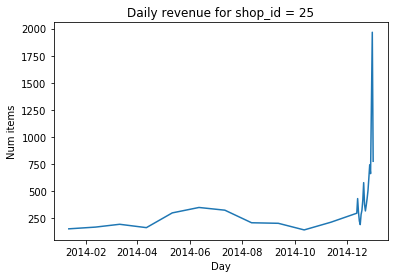

Current answer for task total_num_items_sold_var is: 117167.702299


In [8]:
shop_id = 25

print(type(transactions))
#print(transactions.shop_id)
#print(transactions[transactions['shop_id']==shop_id])
print(transactions[transactions.shop_id==shop_id])
data = transactions[transactions.shop_id==shop_id]
print(data)
data = data[data.date.str.endswith('12.2014')]
print(data)
data = data.item_cnt_day.groupby(data.date).sum()
print(data)

total_num_items_sold = data.values # YOUR CODE GOES HERE
print(total_num_items_sold)
print(data.index)
days = data.index.to_datetime() # YOUR CODE GOES HERE
print(days)

# Plot it
plt.plot(days, total_num_items_sold)
plt.ylabel('Num items')
plt.xlabel('Day')
plt.title("Daily revenue for shop_id = 25")
plt.show()

total_num_items_sold_var = data.var() # PUT YOUR ANSWER IN THIS VARIABLE
grader.submit_tag('total_num_items_sold_var', total_num_items_sold_var)

## Authorization & Submission
To submit assignment to Cousera platform, please, enter your e-mail and token into the variables below. You can generate token on the programming assignment page. *Note:* Token expires 30 minutes after generation.

In [25]:
STUDENT_EMAIL = "jencmhep@gmail.com" # EMAIL HERE
STUDENT_TOKEN = "09YEzoZ17Wk2qHYA" # TOKEN HERE
grader.status()

You want to submit these numbers:
Task max_revenue: 7982852.2
Task category_id_with_max_revenue: 20
Task num_items_constant_price: 5926
Task total_num_items_sold_var: 117167.702299


In [26]:
grader.submit(STUDENT_EMAIL, STUDENT_TOKEN)

Submitted to Coursera platform. See results on assignment page!


Well done! :)